In [44]:
import torch
import matplotlib.pyplot as plt
import tqdm
import utils
import dataloaders
import numpy as np
import torchvision
import os
from trainer import Trainer
torch.random.manual_seed(0)
np.random.seed(0)
torch.backends.cudnn.benchmark = False
torch.backends.cuda.deterministic = True

### Model Definition

In [45]:
class LeNet(torch.nn.Module):

    def __init__(self):
        super().__init__()
        
        ### START YOUR CODE HERE ### (You can change anything inside this block)
        num_input_nodes = 32*32
        num_hidden_nodes = 64
        num_classes = 10
        
        self.classifier1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size=5, stride = 1, padding = 2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride = 2),
            
            torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size=5, stride = 1, padding = 2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride = 2),
            
            torch.nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size=5, stride = 1, padding = 2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride = 2)
        )
        
        self.classifier2 = torch.nn.Sequential(
            torch.nn.Linear(int(128*(32*32)/(4*4*4)), 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 10)
        )
        
        # torch.nn.Conv2d()
        # torch.nn.MaxPool2d()
        
        ### END YOUR CODE HERE ### 

    def forward(self, x):
        ### START YOUR CODE HERE ### (You can change anything inside this block) 
        #x = x.view(-1, 32*32) 
        x = self.classifier1(x)
        x = x.view(-1, int(128*(32*32)/(4*4*4)))
        x = self.classifier2(x)
        return x
        ### END YOUR CODE HERE ### 


### Hyperparameters & Loss function

In [46]:
# Hyperparameters
batch_size = 64
learning_rate = 0.0192
num_epochs = 10


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

### Train model

In [47]:


image_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.5], [0.25])
])
dataloader_train, dataloader_val = dataloaders.load_dataset(batch_size, image_transform)

# Model definition
model = LeNet()
# Transfer model to GPU memory (if possible)
model = utils.to_cuda(model)

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_val=dataloader_val,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict, val_loss_dict = trainer.train(num_epochs)




Training epoch 0:   0%|                                                                        | 0/938 [00:00<?, ?it/s]


Training epoch 0:   0%|                                                                | 1/938 [00:00<06:41,  2.33it/s]


Training epoch 0:   0%|▏                                                               | 2/938 [00:00<06:50,  2.28it/s]


Training epoch 0:   0%|▏                                                               | 3/938 [00:01<06:56,  2.25it/s]


Training epoch 0:   0%|▎                                                               | 4/938 [00:01<06:57,  2.24it/s]


Training epoch 0:   1%|▎                                                               | 5/938 [00:02<06:56,  2.24it/s]


Training epoch 0:   1%|▍                                                               | 6/938 [00:02<06:54,  2.25it/s]


Training epoch 0:   1%|▍                                                               | 7/938 [00:03<06:52,  2.26it/s]


Training epoch 0:   1

Training epoch 0:   7%|████▌                                                          | 67/938 [00:29<06:27,  2.25it/s]


Training epoch 0:   7%|████▌                                                          | 68/938 [00:30<06:24,  2.26it/s]


Training epoch 0:   7%|████▋                                                          | 69/938 [00:30<06:23,  2.26it/s]


Training epoch 0:   7%|████▋                                                          | 70/938 [00:31<06:23,  2.27it/s]


Training epoch 0:   8%|████▊                                                          | 71/938 [00:31<06:23,  2.26it/s]


Training epoch 0:   8%|████▊                                                          | 72/938 [00:32<06:23,  2.26it/s]


Training epoch 0:   8%|████▉                                                          | 73/938 [00:32<06:21,  2.27it/s]


Training epoch 0:   8%|████▉                                                          | 74/938 [00:33<06:21,  2.26it/s]


Training epoch 0:   8%|█

Training epoch 0:  14%|████████▊                                                     | 134/938 [00:59<05:58,  2.24it/s]


Training epoch 0:  14%|████████▉                                                     | 135/938 [01:00<05:57,  2.25it/s]


Training epoch 0:  14%|████████▉                                                     | 136/938 [01:00<05:55,  2.25it/s]


Training epoch 0:  15%|█████████                                                     | 137/938 [01:00<05:54,  2.26it/s]


Training epoch 0:  15%|█████████                                                     | 138/938 [01:01<05:53,  2.26it/s]


Training epoch 0:  15%|█████████▏                                                    | 139/938 [01:01<05:52,  2.27it/s]


Training epoch 0:  15%|█████████▎                                                    | 140/938 [01:02<05:52,  2.27it/s]


Training epoch 0:  15%|█████████▎                                                    | 141/938 [01:02<05:50,  2.27it/s]


Training epoch 0:  15%|█

Training epoch 0:  21%|█████████████▎                                                | 201/938 [01:29<05:28,  2.24it/s]


Training epoch 0:  22%|█████████████▎                                                | 202/938 [01:29<05:27,  2.24it/s]


Training epoch 0:  22%|█████████████▍                                                | 203/938 [01:30<05:26,  2.25it/s]


Training epoch 0:  22%|█████████████▍                                                | 204/938 [01:30<05:26,  2.25it/s]


Training epoch 0:  22%|█████████████▌                                                | 205/938 [01:31<05:25,  2.25it/s]


Training epoch 0:  22%|█████████████▌                                                | 206/938 [01:31<05:24,  2.25it/s]


Training epoch 0:  22%|█████████████▋                                                | 207/938 [01:31<05:25,  2.24it/s]


Training epoch 0:  22%|█████████████▋                                                | 208/938 [01:32<05:24,  2.25it/s]


Training epoch 0:  22%|█

Training epoch 0:  29%|█████████████████▋                                            | 268/938 [01:59<04:55,  2.27it/s]


Training epoch 0:  29%|█████████████████▊                                            | 269/938 [01:59<04:57,  2.25it/s]


Training epoch 0:  29%|█████████████████▊                                            | 270/938 [01:59<04:57,  2.24it/s]


Training epoch 0:  29%|█████████████████▉                                            | 271/938 [02:00<04:57,  2.24it/s]


Training epoch 0:  29%|█████████████████▉                                            | 272/938 [02:00<04:55,  2.26it/s]


Training epoch 0:  29%|██████████████████                                            | 273/938 [02:01<04:53,  2.26it/s]


Training epoch 0:  29%|██████████████████                                            | 274/938 [02:01<04:54,  2.26it/s]


Training epoch 0:  29%|██████████████████▏                                           | 275/938 [02:02<04:55,  2.24it/s]


Training epoch 0:  29%|█

Training epoch 0:  36%|██████████████████████▏                                       | 335/938 [02:28<04:27,  2.25it/s]


Training epoch 0:  36%|██████████████████████▏                                       | 336/938 [02:29<04:25,  2.27it/s]


Training epoch 0:  36%|██████████████████████▎                                       | 337/938 [02:29<04:25,  2.27it/s]


Training epoch 0:  36%|██████████████████████▎                                       | 338/938 [02:30<04:26,  2.25it/s]


Training epoch 0:  36%|██████████████████████▍                                       | 339/938 [02:30<04:25,  2.26it/s]


Training epoch 0:  36%|██████████████████████▍                                       | 340/938 [02:30<04:22,  2.27it/s]


Training epoch 0:  36%|██████████████████████▌                                       | 341/938 [02:31<04:22,  2.27it/s]


Training epoch 0:  36%|██████████████████████▌                                       | 342/938 [02:31<04:23,  2.26it/s]


Training epoch 0:  37%|█

Training epoch 0:  43%|██████████████████████████▌                                   | 402/938 [02:58<03:55,  2.28it/s]


Training epoch 0:  43%|██████████████████████████▋                                   | 403/938 [02:59<03:53,  2.29it/s]


Training epoch 0:  43%|██████████████████████████▋                                   | 404/938 [02:59<03:52,  2.30it/s]


Training epoch 0:  43%|██████████████████████████▊                                   | 405/938 [02:59<03:51,  2.30it/s]


Training epoch 0:  43%|██████████████████████████▊                                   | 406/938 [03:00<03:50,  2.31it/s]


Training epoch 0:  43%|██████████████████████████▉                                   | 407/938 [03:00<03:53,  2.28it/s]


Training epoch 0:  43%|██████████████████████████▉                                   | 408/938 [03:01<04:01,  2.19it/s]


Training epoch 0:  44%|███████████████████████████                                   | 409/938 [03:01<04:06,  2.15it/s]


Training epoch 0:  44%|█

Training epoch 0:  50%|███████████████████████████████                               | 469/938 [03:28<03:25,  2.28it/s]


Training epoch 0:  50%|███████████████████████████████                               | 470/938 [03:29<03:24,  2.29it/s]


Training epoch 0:  50%|███████████████████████████████▏                              | 471/938 [03:29<03:24,  2.29it/s]


Training epoch 0:  50%|███████████████████████████████▏                              | 472/938 [03:30<03:23,  2.29it/s]


Training epoch 0:  50%|███████████████████████████████▎                              | 473/938 [03:30<03:23,  2.28it/s]


Training epoch 0:  51%|███████████████████████████████▎                              | 474/938 [03:31<03:21,  2.30it/s]


Training epoch 0:  51%|███████████████████████████████▍                              | 475/938 [03:31<03:20,  2.31it/s]


Training epoch 0:  51%|███████████████████████████████▍                              | 476/938 [03:31<03:20,  2.30it/s]


Training epoch 0:  51%|█

Training epoch 0:  57%|███████████████████████████████████▍                          | 536/938 [03:58<03:03,  2.20it/s]


Training epoch 0:  57%|███████████████████████████████████▍                          | 537/938 [03:59<02:58,  2.25it/s]


Training epoch 0:  57%|███████████████████████████████████▌                          | 538/938 [03:59<03:00,  2.21it/s]


Training epoch 0:  57%|███████████████████████████████████▋                          | 539/938 [03:59<02:55,  2.28it/s]


Training epoch 0:  58%|███████████████████████████████████▋                          | 540/938 [04:00<02:50,  2.33it/s]


Training epoch 0:  58%|███████████████████████████████████▊                          | 541/938 [04:00<02:48,  2.36it/s]


Training epoch 0:  58%|███████████████████████████████████▊                          | 542/938 [04:01<02:46,  2.38it/s]


Training epoch 0:  58%|███████████████████████████████████▉                          | 543/938 [04:01<02:46,  2.38it/s]


Training epoch 0:  58%|█

Training epoch 0:  64%|███████████████████████████████████████▊                      | 603/938 [04:26<02:20,  2.38it/s]


Training epoch 0:  64%|███████████████████████████████████████▉                      | 604/938 [04:27<02:19,  2.40it/s]


Training epoch 0:  64%|███████████████████████████████████████▉                      | 605/938 [04:27<02:19,  2.38it/s]


Training epoch 0:  65%|████████████████████████████████████████                      | 606/938 [04:27<02:20,  2.37it/s]


Training epoch 0:  65%|████████████████████████████████████████                      | 607/938 [04:28<02:18,  2.39it/s]


Training epoch 0:  65%|████████████████████████████████████████▏                     | 608/938 [04:28<02:20,  2.35it/s]


Training epoch 0:  65%|████████████████████████████████████████▎                     | 609/938 [04:29<02:18,  2.37it/s]


Training epoch 0:  65%|████████████████████████████████████████▎                     | 610/938 [04:29<02:18,  2.37it/s]


Training epoch 0:  65%|█

Training epoch 0:  71%|████████████████████████████████████████████▎                 | 670/938 [04:54<01:51,  2.40it/s]


Training epoch 0:  72%|████████████████████████████████████████████▎                 | 671/938 [04:55<01:51,  2.40it/s]


Training epoch 0:  72%|████████████████████████████████████████████▍                 | 672/938 [04:55<01:51,  2.39it/s]


Training epoch 0:  72%|████████████████████████████████████████████▍                 | 673/938 [04:56<01:49,  2.43it/s]


Training epoch 0:  72%|████████████████████████████████████████████▌                 | 674/938 [04:56<01:48,  2.44it/s]


Training epoch 0:  72%|████████████████████████████████████████████▌                 | 675/938 [04:56<01:47,  2.44it/s]


Training epoch 0:  72%|████████████████████████████████████████████▋                 | 676/938 [04:57<01:48,  2.42it/s]


Training epoch 0:  72%|████████████████████████████████████████████▋                 | 677/938 [04:57<01:48,  2.41it/s]


Training epoch 0:  72%|█

Training epoch 0:  79%|████████████████████████████████████████████████▋             | 737/938 [05:22<01:24,  2.39it/s]


Training epoch 0:  79%|████████████████████████████████████████████████▊             | 738/938 [05:23<01:22,  2.41it/s]


Training epoch 0:  79%|████████████████████████████████████████████████▊             | 739/938 [05:23<01:22,  2.40it/s]


Training epoch 0:  79%|████████████████████████████████████████████████▉             | 740/938 [05:24<01:22,  2.40it/s]


Training epoch 0:  79%|████████████████████████████████████████████████▉             | 741/938 [05:24<01:22,  2.40it/s]


Training epoch 0:  79%|█████████████████████████████████████████████████             | 742/938 [05:24<01:21,  2.40it/s]


Training epoch 0:  79%|█████████████████████████████████████████████████             | 743/938 [05:25<01:21,  2.38it/s]


Training epoch 0:  79%|█████████████████████████████████████████████████▏            | 744/938 [05:25<01:20,  2.42it/s]


Training epoch 0:  79%|█

Training epoch 0:  86%|█████████████████████████████████████████████████████▏        | 804/938 [05:50<00:55,  2.41it/s]


Training epoch 0:  86%|█████████████████████████████████████████████████████▏        | 805/938 [05:51<00:54,  2.43it/s]


Training epoch 0:  86%|█████████████████████████████████████████████████████▎        | 806/938 [05:51<00:54,  2.43it/s]


Training epoch 0:  86%|█████████████████████████████████████████████████████▎        | 807/938 [05:51<00:53,  2.45it/s]


Training epoch 0:  86%|█████████████████████████████████████████████████████▍        | 808/938 [05:52<00:53,  2.44it/s]


Training epoch 0:  86%|█████████████████████████████████████████████████████▍        | 809/938 [05:52<00:52,  2.46it/s]


Training epoch 0:  86%|█████████████████████████████████████████████████████▌        | 810/938 [05:53<00:52,  2.43it/s]


Training epoch 0:  86%|█████████████████████████████████████████████████████▌        | 811/938 [05:53<00:52,  2.44it/s]


Training epoch 0:  87%|█

Training epoch 0:  93%|█████████████████████████████████████████████████████████▌    | 871/938 [06:18<00:28,  2.36it/s]


Training epoch 0:  93%|█████████████████████████████████████████████████████████▋    | 872/938 [06:19<00:27,  2.37it/s]


Training epoch 0:  93%|█████████████████████████████████████████████████████████▋    | 873/938 [06:19<00:27,  2.36it/s]


Training epoch 0:  93%|█████████████████████████████████████████████████████████▊    | 874/938 [06:20<00:27,  2.35it/s]


Training epoch 0:  93%|█████████████████████████████████████████████████████████▊    | 875/938 [06:20<00:27,  2.33it/s]


Training epoch 0:  93%|█████████████████████████████████████████████████████████▉    | 876/938 [06:20<00:26,  2.36it/s]


Training epoch 0:  93%|█████████████████████████████████████████████████████████▉    | 877/938 [06:21<00:26,  2.33it/s]


Training epoch 0:  94%|██████████████████████████████████████████████████████████    | 878/938 [06:21<00:25,  2.35it/s]


Training epoch 0:  94%|█

Training epoch 0: 100%|██████████████████████████████████████████████████████████████| 938/938 [06:46<00:00,  2.31it/s]



Training epoch 1:   0%|                                                                        | 0/938 [00:00<?, ?it/s]


Training epoch 1:   0%|                                                                | 1/938 [00:00<05:37,  2.78it/s]


Training epoch 1:   0%|▏                                                               | 2/938 [00:00<05:53,  2.65it/s]


Training epoch 1:   0%|▏                                                               | 3/938 [00:01<06:01,  2.58it/s]


Training epoch 1:   0%|▎                                                               | 4/938 [00:01<06:11,  2.52it/s]


Training epoch 1:   1%|▎                                                               | 5/938 [00:02<06:14,  2.49it/s]


Training epoch 1:   1%|▍                                                               | 6/938 [00:02<06:18,  2.46it/s]


Training epoch 1:   1%|

Training epoch 1:   7%|████▍                                                          | 66/938 [00:27<06:10,  2.36it/s]


Training epoch 1:   7%|████▌                                                          | 67/938 [00:27<06:06,  2.38it/s]


Training epoch 1:   7%|████▌                                                          | 68/938 [00:28<06:03,  2.40it/s]


Training epoch 1:   7%|████▋                                                          | 69/938 [00:28<06:06,  2.37it/s]


Training epoch 1:   7%|████▋                                                          | 70/938 [00:29<06:01,  2.40it/s]


Training epoch 1:   8%|████▊                                                          | 71/938 [00:29<06:04,  2.38it/s]


Training epoch 1:   8%|████▊                                                          | 72/938 [00:29<06:03,  2.38it/s]


Training epoch 1:   8%|████▉                                                          | 73/938 [00:30<06:01,  2.39it/s]


Training epoch 1:   8%|█

Training epoch 1:  14%|████████▊                                                     | 133/938 [00:55<05:47,  2.32it/s]


Training epoch 1:  14%|████████▊                                                     | 134/938 [00:56<05:43,  2.34it/s]


Training epoch 1:  14%|████████▉                                                     | 135/938 [00:56<05:40,  2.36it/s]


Training epoch 1:  14%|████████▉                                                     | 136/938 [00:56<05:37,  2.38it/s]


Training epoch 1:  15%|█████████                                                     | 137/938 [00:57<05:36,  2.38it/s]


Training epoch 1:  15%|█████████                                                     | 138/938 [00:57<05:34,  2.39it/s]


Training epoch 1:  15%|█████████▏                                                    | 139/938 [00:58<05:35,  2.38it/s]


Training epoch 1:  15%|█████████▎                                                    | 140/938 [00:58<05:39,  2.35it/s]


Training epoch 1:  15%|█

Training epoch 1:  21%|█████████████▏                                                | 200/938 [01:23<05:07,  2.40it/s]


Training epoch 1:  21%|█████████████▎                                                | 201/938 [01:24<05:08,  2.39it/s]


Training epoch 1:  22%|█████████████▎                                                | 202/938 [01:24<05:05,  2.41it/s]


Training epoch 1:  22%|█████████████▍                                                | 203/938 [01:24<05:04,  2.41it/s]


Training epoch 1:  22%|█████████████▍                                                | 204/938 [01:25<05:04,  2.41it/s]


Training epoch 1:  22%|█████████████▌                                                | 205/938 [01:25<05:04,  2.41it/s]


Training epoch 1:  22%|█████████████▌                                                | 206/938 [01:26<05:06,  2.39it/s]


Training epoch 1:  22%|█████████████▋                                                | 207/938 [01:26<05:04,  2.40it/s]


Training epoch 1:  22%|█

Training epoch 1:  28%|█████████████████▋                                            | 267/938 [01:51<04:47,  2.33it/s]


Training epoch 1:  29%|█████████████████▋                                            | 268/938 [01:52<04:43,  2.37it/s]


Training epoch 1:  29%|█████████████████▊                                            | 269/938 [01:52<04:40,  2.39it/s]


Training epoch 1:  29%|█████████████████▊                                            | 270/938 [01:52<04:38,  2.40it/s]


Training epoch 1:  29%|█████████████████▉                                            | 271/938 [01:53<04:38,  2.40it/s]


Training epoch 1:  29%|█████████████████▉                                            | 272/938 [01:53<04:37,  2.40it/s]


Training epoch 1:  29%|██████████████████                                            | 273/938 [01:54<04:37,  2.39it/s]


Training epoch 1:  29%|██████████████████                                            | 274/938 [01:54<04:34,  2.42it/s]


Training epoch 1:  29%|█

Training epoch 1:  36%|██████████████████████                                        | 334/938 [02:19<04:10,  2.42it/s]


Training epoch 1:  36%|██████████████████████▏                                       | 335/938 [02:20<04:11,  2.39it/s]


Training epoch 1:  36%|██████████████████████▏                                       | 336/938 [02:20<04:09,  2.41it/s]


Training epoch 1:  36%|██████████████████████▎                                       | 337/938 [02:20<04:10,  2.40it/s]


Training epoch 1:  36%|██████████████████████▎                                       | 338/938 [02:21<04:10,  2.40it/s]


Training epoch 1:  36%|██████████████████████▍                                       | 339/938 [02:21<04:11,  2.38it/s]


Training epoch 1:  36%|██████████████████████▍                                       | 340/938 [02:22<04:11,  2.38it/s]


Training epoch 1:  36%|██████████████████████▌                                       | 341/938 [02:22<04:07,  2.41it/s]


Training epoch 1:  36%|█

Training epoch 1:  43%|██████████████████████████▌                                   | 401/938 [02:47<03:43,  2.40it/s]


Training epoch 1:  43%|██████████████████████████▌                                   | 402/938 [02:48<03:43,  2.40it/s]


Training epoch 1:  43%|██████████████████████████▋                                   | 403/938 [02:48<03:44,  2.38it/s]


Training epoch 1:  43%|██████████████████████████▋                                   | 404/938 [02:48<03:41,  2.41it/s]


Training epoch 1:  43%|██████████████████████████▊                                   | 405/938 [02:49<03:42,  2.40it/s]


Training epoch 1:  43%|██████████████████████████▊                                   | 406/938 [02:49<03:42,  2.39it/s]


Training epoch 1:  43%|██████████████████████████▉                                   | 407/938 [02:50<03:39,  2.42it/s]


Training epoch 1:  43%|██████████████████████████▉                                   | 408/938 [02:50<03:40,  2.40it/s]


Training epoch 1:  44%|█

Training epoch 1:  50%|██████████████████████████████▉                               | 468/938 [03:15<03:15,  2.40it/s]


Training epoch 1:  50%|███████████████████████████████                               | 469/938 [03:15<03:15,  2.40it/s]


Training epoch 1:  50%|███████████████████████████████                               | 470/938 [03:16<03:16,  2.38it/s]


Training epoch 1:  50%|███████████████████████████████▏                              | 471/938 [03:16<03:17,  2.37it/s]


Training epoch 1:  50%|███████████████████████████████▏                              | 472/938 [03:17<03:16,  2.38it/s]


Training epoch 1:  50%|███████████████████████████████▎                              | 473/938 [03:17<03:13,  2.41it/s]


Training epoch 1:  51%|███████████████████████████████▎                              | 474/938 [03:17<03:12,  2.41it/s]


Training epoch 1:  51%|███████████████████████████████▍                              | 475/938 [03:18<03:12,  2.41it/s]


Training epoch 1:  51%|█

Training epoch 1:  57%|███████████████████████████████████▎                          | 535/938 [03:43<02:45,  2.44it/s]


Training epoch 1:  57%|███████████████████████████████████▍                          | 536/938 [03:43<02:47,  2.40it/s]


Training epoch 1:  57%|███████████████████████████████████▍                          | 537/938 [03:44<02:46,  2.41it/s]


Training epoch 1:  57%|███████████████████████████████████▌                          | 538/938 [03:44<02:45,  2.42it/s]


Training epoch 1:  57%|███████████████████████████████████▋                          | 539/938 [03:45<02:45,  2.41it/s]


Training epoch 1:  58%|███████████████████████████████████▋                          | 540/938 [03:45<02:44,  2.42it/s]


Training epoch 1:  58%|███████████████████████████████████▊                          | 541/938 [03:45<02:42,  2.45it/s]


Training epoch 1:  58%|███████████████████████████████████▊                          | 542/938 [03:46<02:42,  2.43it/s]


Training epoch 1:  58%|█

Training epoch 1:  64%|███████████████████████████████████████▊                      | 602/938 [04:11<02:20,  2.40it/s]


Training epoch 1:  64%|███████████████████████████████████████▊                      | 603/938 [04:11<02:20,  2.39it/s]


Training epoch 1:  64%|███████████████████████████████████████▉                      | 604/938 [04:12<02:20,  2.37it/s]


Training epoch 1:  64%|███████████████████████████████████████▉                      | 605/938 [04:12<02:20,  2.38it/s]


Training epoch 1:  65%|████████████████████████████████████████                      | 606/938 [04:12<02:20,  2.36it/s]


Training epoch 1:  65%|████████████████████████████████████████                      | 607/938 [04:13<02:21,  2.35it/s]


Training epoch 1:  65%|████████████████████████████████████████▏                     | 608/938 [04:13<02:19,  2.37it/s]


Training epoch 1:  65%|████████████████████████████████████████▎                     | 609/938 [04:14<02:19,  2.36it/s]


Training epoch 1:  65%|█

Training epoch 1:  71%|████████████████████████████████████████████▏                 | 669/938 [04:39<01:50,  2.43it/s]


Training epoch 1:  71%|████████████████████████████████████████████▎                 | 670/938 [04:39<01:50,  2.42it/s]


Training epoch 1:  72%|████████████████████████████████████████████▎                 | 671/938 [04:39<01:49,  2.43it/s]


Training epoch 1:  72%|████████████████████████████████████████████▍                 | 672/938 [04:40<01:49,  2.43it/s]


Training epoch 1:  72%|████████████████████████████████████████████▍                 | 673/938 [04:40<01:49,  2.41it/s]


Training epoch 1:  72%|████████████████████████████████████████████▌                 | 674/938 [04:41<01:49,  2.42it/s]


Training epoch 1:  72%|████████████████████████████████████████████▌                 | 675/938 [04:41<01:49,  2.41it/s]


Training epoch 1:  72%|████████████████████████████████████████████▋                 | 676/938 [04:42<01:48,  2.41it/s]


Training epoch 1:  72%|█

Training epoch 1:  78%|████████████████████████████████████████████████▋             | 736/938 [05:06<01:23,  2.42it/s]


Training epoch 1:  79%|████████████████████████████████████████████████▋             | 737/938 [05:07<01:23,  2.42it/s]


Training epoch 1:  79%|████████████████████████████████████████████████▊             | 738/938 [05:07<01:22,  2.44it/s]


Training epoch 1:  79%|████████████████████████████████████████████████▊             | 739/938 [05:08<01:20,  2.48it/s]


Training epoch 1:  79%|████████████████████████████████████████████████▉             | 740/938 [05:08<01:20,  2.46it/s]


Training epoch 1:  79%|████████████████████████████████████████████████▉             | 741/938 [05:08<01:20,  2.44it/s]


Training epoch 1:  79%|█████████████████████████████████████████████████             | 742/938 [05:09<01:21,  2.40it/s]


Training epoch 1:  79%|█████████████████████████████████████████████████             | 743/938 [05:09<01:21,  2.39it/s]


Training epoch 1:  79%|█

Training epoch 1:  86%|█████████████████████████████████████████████████████         | 803/938 [05:34<00:56,  2.40it/s]


Training epoch 1:  86%|█████████████████████████████████████████████████████▏        | 804/938 [05:35<00:55,  2.42it/s]


Training epoch 1:  86%|█████████████████████████████████████████████████████▏        | 805/938 [05:35<00:55,  2.40it/s]


Training epoch 1:  86%|█████████████████████████████████████████████████████▎        | 806/938 [05:36<00:55,  2.39it/s]


Training epoch 1:  86%|█████████████████████████████████████████████████████▎        | 807/938 [05:36<00:54,  2.40it/s]


Training epoch 1:  86%|█████████████████████████████████████████████████████▍        | 808/938 [05:36<00:53,  2.42it/s]


Training epoch 1:  86%|█████████████████████████████████████████████████████▍        | 809/938 [05:37<00:52,  2.44it/s]


Training epoch 1:  86%|█████████████████████████████████████████████████████▌        | 810/938 [05:37<00:52,  2.43it/s]


Training epoch 1:  86%|█

Training epoch 1:  93%|█████████████████████████████████████████████████████████▌    | 870/938 [06:02<00:28,  2.39it/s]


Training epoch 1:  93%|█████████████████████████████████████████████████████████▌    | 871/938 [06:03<00:27,  2.40it/s]


Training epoch 1:  93%|█████████████████████████████████████████████████████████▋    | 872/938 [06:03<00:27,  2.39it/s]


Training epoch 1:  93%|█████████████████████████████████████████████████████████▋    | 873/938 [06:03<00:26,  2.41it/s]


Training epoch 1:  93%|█████████████████████████████████████████████████████████▊    | 874/938 [06:04<00:26,  2.42it/s]


Training epoch 1:  93%|█████████████████████████████████████████████████████████▊    | 875/938 [06:04<00:25,  2.42it/s]


Training epoch 1:  93%|█████████████████████████████████████████████████████████▉    | 876/938 [06:05<00:25,  2.46it/s]


Training epoch 1:  93%|█████████████████████████████████████████████████████████▉    | 877/938 [06:05<00:24,  2.44it/s]


Training epoch 1:  94%|█

Training epoch 1: 100%|█████████████████████████████████████████████████████████████▉| 937/938 [06:31<00:00,  2.29it/s]


Training epoch 1: 100%|██████████████████████████████████████████████████████████████| 938/938 [06:31<00:00,  2.39it/s]



Training epoch 2:   0%|                                                                        | 0/938 [00:00<?, ?it/s]


Training epoch 2:   0%|                                                                | 1/938 [00:00<05:57,  2.62it/s]


Training epoch 2:   0%|▏                                                               | 2/938 [00:00<06:06,  2.55it/s]


Training epoch 2:   0%|▏                                                               | 3/938 [00:01<06:15,  2.49it/s]


Training epoch 2:   0%|▎                                                               | 4/938 [00:01<06:22,  2.44it/s]


Training epoch 2:   1%|▎                                                               | 5/938 [00:02<06:31,  2.38it/s]


Training epoch 2:   1%|

Training epoch 2:   7%|████▎                                                          | 65/938 [00:27<06:13,  2.34it/s]


Training epoch 2:   7%|████▍                                                          | 66/938 [00:28<06:15,  2.32it/s]


Training epoch 2:   7%|████▌                                                          | 67/938 [00:28<06:09,  2.36it/s]


Training epoch 2:   7%|████▌                                                          | 68/938 [00:29<06:08,  2.36it/s]


Training epoch 2:   7%|████▋                                                          | 69/938 [00:29<06:10,  2.35it/s]


Training epoch 2:   7%|████▋                                                          | 70/938 [00:29<06:08,  2.36it/s]


Training epoch 2:   8%|████▊                                                          | 71/938 [00:30<06:10,  2.34it/s]


Training epoch 2:   8%|████▊                                                          | 72/938 [00:30<06:11,  2.33it/s]


Training epoch 2:   8%|█

Training epoch 2:  14%|████████▋                                                     | 132/938 [00:56<05:41,  2.36it/s]


Training epoch 2:  14%|████████▊                                                     | 133/938 [00:56<05:39,  2.37it/s]


Training epoch 2:  14%|████████▊                                                     | 134/938 [00:57<05:38,  2.38it/s]


Training epoch 2:  14%|████████▉                                                     | 135/938 [00:57<05:38,  2.37it/s]


Training epoch 2:  14%|████████▉                                                     | 136/938 [00:58<05:36,  2.38it/s]


Training epoch 2:  15%|█████████                                                     | 137/938 [00:58<05:37,  2.37it/s]


Training epoch 2:  15%|█████████                                                     | 138/938 [00:58<05:39,  2.36it/s]


Training epoch 2:  15%|█████████▏                                                    | 139/938 [00:59<05:41,  2.34it/s]


Training epoch 2:  15%|█

Training epoch 2:  21%|█████████████▏                                                | 199/938 [01:24<05:12,  2.36it/s]


Training epoch 2:  21%|█████████████▏                                                | 200/938 [01:25<05:15,  2.34it/s]


Training epoch 2:  21%|█████████████▎                                                | 201/938 [01:25<05:18,  2.31it/s]


Training epoch 2:  22%|█████████████▎                                                | 202/938 [01:26<05:17,  2.32it/s]


Training epoch 2:  22%|█████████████▍                                                | 203/938 [01:26<05:17,  2.31it/s]


Training epoch 2:  22%|█████████████▍                                                | 204/938 [01:27<05:16,  2.32it/s]


Training epoch 2:  22%|█████████████▌                                                | 205/938 [01:27<05:12,  2.34it/s]


Training epoch 2:  22%|█████████████▌                                                | 206/938 [01:27<05:09,  2.36it/s]


Training epoch 2:  22%|█

Training epoch 2:  28%|█████████████████▌                                            | 266/938 [01:53<04:44,  2.36it/s]


Training epoch 2:  28%|█████████████████▋                                            | 267/938 [01:53<04:46,  2.34it/s]


Training epoch 2:  29%|█████████████████▋                                            | 268/938 [01:54<04:45,  2.35it/s]


Training epoch 2:  29%|█████████████████▊                                            | 269/938 [01:54<04:46,  2.33it/s]


Training epoch 2:  29%|█████████████████▊                                            | 270/938 [01:55<04:46,  2.33it/s]


Training epoch 2:  29%|█████████████████▉                                            | 271/938 [01:55<04:44,  2.34it/s]


Training epoch 2:  29%|█████████████████▉                                            | 272/938 [01:55<04:46,  2.33it/s]


Training epoch 2:  29%|██████████████████                                            | 273/938 [01:56<04:43,  2.34it/s]


Training epoch 2:  29%|█

Training epoch 2:  36%|██████████████████████                                        | 333/938 [02:22<04:21,  2.31it/s]


Training epoch 2:  36%|██████████████████████                                        | 334/938 [02:22<04:19,  2.33it/s]


Training epoch 2:  36%|██████████████████████▏                                       | 335/938 [02:22<04:19,  2.32it/s]


Training epoch 2:  36%|██████████████████████▏                                       | 336/938 [02:23<04:18,  2.33it/s]


Training epoch 2:  36%|██████████████████████▎                                       | 337/938 [02:23<04:20,  2.31it/s]


Training epoch 2:  36%|██████████████████████▎                                       | 338/938 [02:24<04:14,  2.35it/s]


Training epoch 2:  36%|██████████████████████▍                                       | 339/938 [02:24<04:19,  2.31it/s]


Training epoch 2:  36%|██████████████████████▍                                       | 340/938 [02:25<04:17,  2.32it/s]


Training epoch 2:  36%|█

Training epoch 2:  43%|██████████████████████████▍                                   | 400/938 [02:50<03:52,  2.32it/s]


Training epoch 2:  43%|██████████████████████████▌                                   | 401/938 [02:51<03:48,  2.35it/s]


Training epoch 2:  43%|██████████████████████████▌                                   | 402/938 [02:51<03:48,  2.34it/s]


Training epoch 2:  43%|██████████████████████████▋                                   | 403/938 [02:52<03:46,  2.36it/s]


Training epoch 2:  43%|██████████████████████████▋                                   | 404/938 [02:52<03:48,  2.34it/s]


Training epoch 2:  43%|██████████████████████████▊                                   | 405/938 [02:52<03:45,  2.36it/s]


Training epoch 2:  43%|██████████████████████████▊                                   | 406/938 [02:53<03:45,  2.36it/s]


Training epoch 2:  43%|██████████████████████████▉                                   | 407/938 [02:53<03:42,  2.39it/s]


Training epoch 2:  43%|█

Training epoch 2:  50%|██████████████████████████████▊                               | 467/938 [03:19<03:20,  2.35it/s]


Training epoch 2:  50%|██████████████████████████████▉                               | 468/938 [03:19<03:19,  2.35it/s]


Training epoch 2:  50%|███████████████████████████████                               | 469/938 [03:20<03:19,  2.36it/s]


Training epoch 2:  50%|███████████████████████████████                               | 470/938 [03:20<03:18,  2.36it/s]


Training epoch 2:  50%|███████████████████████████████▏                              | 471/938 [03:20<03:17,  2.36it/s]


Training epoch 2:  50%|███████████████████████████████▏                              | 472/938 [03:21<03:17,  2.36it/s]


Training epoch 2:  50%|███████████████████████████████▎                              | 473/938 [03:21<03:18,  2.35it/s]


Training epoch 2:  51%|███████████████████████████████▎                              | 474/938 [03:22<03:17,  2.35it/s]


Training epoch 2:  51%|█

Training epoch 2:  57%|███████████████████████████████████▎                          | 534/938 [03:47<02:54,  2.31it/s]


Training epoch 2:  57%|███████████████████████████████████▎                          | 535/938 [03:48<02:52,  2.33it/s]


Training epoch 2:  57%|███████████████████████████████████▍                          | 536/938 [03:48<02:52,  2.33it/s]


Training epoch 2:  57%|███████████████████████████████████▍                          | 537/938 [03:48<02:50,  2.35it/s]


Training epoch 2:  57%|███████████████████████████████████▌                          | 538/938 [03:49<02:51,  2.33it/s]


Training epoch 2:  57%|███████████████████████████████████▋                          | 539/938 [03:49<02:50,  2.34it/s]


Training epoch 2:  58%|███████████████████████████████████▋                          | 540/938 [03:50<02:50,  2.34it/s]


Training epoch 2:  58%|███████████████████████████████████▊                          | 541/938 [03:50<02:50,  2.32it/s]


Training epoch 2:  58%|█

Training epoch 2:  64%|███████████████████████████████████████▋                      | 601/938 [04:16<02:23,  2.34it/s]


Training epoch 2:  64%|███████████████████████████████████████▊                      | 602/938 [04:16<02:23,  2.33it/s]


Training epoch 2:  64%|███████████████████████████████████████▊                      | 603/938 [04:17<02:23,  2.33it/s]


Training epoch 2:  64%|███████████████████████████████████████▉                      | 604/938 [04:17<02:23,  2.33it/s]


Training epoch 2:  64%|███████████████████████████████████████▉                      | 605/938 [04:18<02:22,  2.33it/s]


Training epoch 2:  65%|████████████████████████████████████████                      | 606/938 [04:18<02:21,  2.35it/s]


Training epoch 2:  65%|████████████████████████████████████████                      | 607/938 [04:18<02:20,  2.36it/s]


Training epoch 2:  65%|████████████████████████████████████████▏                     | 608/938 [04:19<02:21,  2.34it/s]


Training epoch 2:  65%|█

Training epoch 2:  71%|████████████████████████████████████████████▏                 | 668/938 [04:44<01:55,  2.34it/s]


Training epoch 2:  71%|████████████████████████████████████████████▏                 | 669/938 [04:45<01:54,  2.35it/s]


Training epoch 2:  71%|████████████████████████████████████████████▎                 | 670/938 [04:45<01:54,  2.35it/s]


Training epoch 2:  72%|████████████████████████████████████████████▎                 | 671/938 [04:46<01:52,  2.38it/s]


Training epoch 2:  72%|████████████████████████████████████████████▍                 | 672/938 [04:46<01:52,  2.36it/s]


Training epoch 2:  72%|████████████████████████████████████████████▍                 | 673/938 [04:47<01:51,  2.37it/s]


Training epoch 2:  72%|████████████████████████████████████████████▌                 | 674/938 [04:47<01:51,  2.36it/s]


Training epoch 2:  72%|████████████████████████████████████████████▌                 | 675/938 [04:47<01:50,  2.37it/s]


Training epoch 2:  72%|█

Training epoch 2:  78%|████████████████████████████████████████████████▌             | 735/938 [05:13<01:26,  2.35it/s]


Training epoch 2:  78%|████████████████████████████████████████████████▋             | 736/938 [05:13<01:25,  2.35it/s]


Training epoch 2:  79%|████████████████████████████████████████████████▋             | 737/938 [05:14<01:25,  2.34it/s]


Training epoch 2:  79%|████████████████████████████████████████████████▊             | 738/938 [05:14<01:25,  2.35it/s]


Training epoch 2:  79%|████████████████████████████████████████████████▊             | 739/938 [05:15<01:24,  2.36it/s]


Training epoch 2:  79%|████████████████████████████████████████████████▉             | 740/938 [05:15<01:23,  2.36it/s]


Training epoch 2:  79%|████████████████████████████████████████████████▉             | 741/938 [05:15<01:23,  2.37it/s]


Training epoch 2:  79%|█████████████████████████████████████████████████             | 742/938 [05:16<01:23,  2.36it/s]


Training epoch 2:  79%|█

Training epoch 2:  86%|█████████████████████████████████████████████████████         | 802/938 [05:42<00:57,  2.36it/s]


Training epoch 2:  86%|█████████████████████████████████████████████████████         | 803/938 [05:42<00:57,  2.35it/s]


Training epoch 2:  86%|█████████████████████████████████████████████████████▏        | 804/938 [05:43<00:57,  2.34it/s]


Training epoch 2:  86%|█████████████████████████████████████████████████████▏        | 805/938 [05:43<00:56,  2.35it/s]


Training epoch 2:  86%|█████████████████████████████████████████████████████▎        | 806/938 [05:43<00:56,  2.36it/s]


Training epoch 2:  86%|█████████████████████████████████████████████████████▎        | 807/938 [05:44<00:55,  2.37it/s]


Training epoch 2:  86%|█████████████████████████████████████████████████████▍        | 808/938 [05:44<00:55,  2.36it/s]


Training epoch 2:  86%|█████████████████████████████████████████████████████▍        | 809/938 [05:45<00:54,  2.35it/s]


Training epoch 2:  86%|█

Training epoch 2:  93%|█████████████████████████████████████████████████████████▍    | 869/938 [06:10<00:30,  2.30it/s]


Training epoch 2:  93%|█████████████████████████████████████████████████████████▌    | 870/938 [06:11<00:29,  2.28it/s]


Training epoch 2:  93%|█████████████████████████████████████████████████████████▌    | 871/938 [06:11<00:29,  2.26it/s]


Training epoch 2:  93%|█████████████████████████████████████████████████████████▋    | 872/938 [06:11<00:29,  2.27it/s]


Training epoch 2:  93%|█████████████████████████████████████████████████████████▋    | 873/938 [06:12<00:28,  2.30it/s]


Training epoch 2:  93%|█████████████████████████████████████████████████████████▊    | 874/938 [06:12<00:27,  2.29it/s]


Training epoch 2:  93%|█████████████████████████████████████████████████████████▊    | 875/938 [06:13<00:30,  2.09it/s]


Training epoch 2:  93%|█████████████████████████████████████████████████████████▉    | 876/938 [06:13<00:30,  2.05it/s]


Training epoch 2:  93%|█

Training epoch 2: 100%|█████████████████████████████████████████████████████████████▊| 936/938 [06:39<00:00,  2.35it/s]


Training epoch 2: 100%|█████████████████████████████████████████████████████████████▉| 937/938 [06:40<00:00,  2.37it/s]


Training epoch 2: 100%|██████████████████████████████████████████████████████████████| 938/938 [06:40<00:00,  2.34it/s]



Training epoch 3:   0%|                                                                        | 0/938 [00:00<?, ?it/s]


Training epoch 3:   0%|                                                                | 1/938 [00:00<06:01,  2.59it/s]


Training epoch 3:   0%|▏                                                               | 2/938 [00:00<06:15,  2.49it/s]


Training epoch 3:   0%|▏                                                               | 3/938 [00:01<06:18,  2.47it/s]


Training epoch 3:   0%|▎                                                               | 4/938 [00:01<06:24,  2.43it/s]


Training epoch 3:   1%|

Training epoch 3:   7%|████▎                                                          | 64/938 [00:28<06:14,  2.33it/s]


Training epoch 3:   7%|████▎                                                          | 65/938 [00:28<06:16,  2.32it/s]


Training epoch 3:   7%|████▍                                                          | 66/938 [00:29<06:19,  2.30it/s]


Training epoch 3:   7%|████▌                                                          | 67/938 [00:29<06:21,  2.29it/s]


Training epoch 3:   7%|████▌                                                          | 68/938 [00:30<06:18,  2.30it/s]


Training epoch 3:   7%|████▋                                                          | 69/938 [00:30<06:18,  2.30it/s]


Training epoch 3:   7%|████▋                                                          | 70/938 [00:30<06:18,  2.29it/s]


Training epoch 3:   8%|████▊                                                          | 71/938 [00:31<06:15,  2.31it/s]


Training epoch 3:   8%|█

Training epoch 3:  14%|████████▋                                                     | 131/938 [00:58<06:55,  1.94it/s]


Training epoch 3:  14%|████████▋                                                     | 132/938 [00:58<06:42,  2.00it/s]


Training epoch 3:  14%|████████▊                                                     | 133/938 [00:59<06:32,  2.05it/s]


Training epoch 3:  14%|████████▊                                                     | 134/938 [00:59<06:25,  2.08it/s]


Training epoch 3:  14%|████████▉                                                     | 135/938 [00:59<06:21,  2.11it/s]


Training epoch 3:  14%|████████▉                                                     | 136/938 [01:00<06:19,  2.11it/s]


Training epoch 3:  15%|█████████                                                     | 137/938 [01:00<06:18,  2.12it/s]


Training epoch 3:  15%|█████████                                                     | 138/938 [01:01<06:17,  2.12it/s]


Training epoch 3:  15%|█

Training epoch 3:  21%|█████████████                                                 | 198/938 [01:42<09:31,  1.30it/s]


Training epoch 3:  21%|█████████████▏                                                | 199/938 [01:43<09:25,  1.31it/s]


Training epoch 3:  21%|█████████████▏                                                | 200/938 [01:43<09:19,  1.32it/s]


Training epoch 3:  21%|█████████████▎                                                | 201/938 [01:44<09:17,  1.32it/s]


Training epoch 3:  22%|█████████████▎                                                | 202/938 [01:45<09:13,  1.33it/s]


Training epoch 3:  22%|█████████████▍                                                | 203/938 [01:46<09:13,  1.33it/s]


Training epoch 3:  22%|█████████████▍                                                | 204/938 [01:46<09:10,  1.33it/s]


Training epoch 3:  22%|█████████████▌                                                | 205/938 [01:47<09:09,  1.33it/s]


Training epoch 3:  22%|█

Training epoch 3:  28%|█████████████████▌                                            | 265/938 [02:32<08:31,  1.31it/s]


Training epoch 3:  28%|█████████████████▌                                            | 266/938 [02:33<08:31,  1.31it/s]


Training epoch 3:  28%|█████████████████▋                                            | 267/938 [02:33<08:28,  1.32it/s]


Training epoch 3:  29%|█████████████████▋                                            | 268/938 [02:34<08:27,  1.32it/s]


Training epoch 3:  29%|█████████████████▊                                            | 269/938 [02:35<08:38,  1.29it/s]


Training epoch 3:  29%|█████████████████▊                                            | 270/938 [02:36<08:34,  1.30it/s]


Training epoch 3:  29%|█████████████████▉                                            | 271/938 [02:37<08:35,  1.29it/s]


Training epoch 3:  29%|█████████████████▉                                            | 272/938 [02:37<08:25,  1.32it/s]


Training epoch 3:  29%|█

Training epoch 3:  35%|█████████████████████▉                                        | 332/938 [03:22<07:29,  1.35it/s]


Training epoch 3:  36%|██████████████████████                                        | 333/938 [03:23<07:30,  1.34it/s]


Training epoch 3:  36%|██████████████████████                                        | 334/938 [03:24<07:31,  1.34it/s]


Training epoch 3:  36%|██████████████████████▏                                       | 335/938 [03:25<07:30,  1.34it/s]


Training epoch 3:  36%|██████████████████████▏                                       | 336/938 [03:25<07:28,  1.34it/s]


Training epoch 3:  36%|██████████████████████▎                                       | 337/938 [03:26<07:38,  1.31it/s]


Training epoch 3:  36%|██████████████████████▎                                       | 338/938 [03:27<07:37,  1.31it/s]


Training epoch 3:  36%|██████████████████████▍                                       | 339/938 [03:28<07:32,  1.32it/s]


Training epoch 3:  36%|█

Training epoch 3:  43%|██████████████████████████▎                                   | 399/938 [04:13<06:40,  1.35it/s]


Training epoch 3:  43%|██████████████████████████▍                                   | 400/938 [04:14<06:35,  1.36it/s]


Training epoch 3:  43%|██████████████████████████▌                                   | 401/938 [04:14<06:37,  1.35it/s]


Training epoch 3:  43%|██████████████████████████▌                                   | 402/938 [04:15<06:35,  1.35it/s]


Training epoch 3:  43%|██████████████████████████▋                                   | 403/938 [04:16<06:40,  1.34it/s]


Training epoch 3:  43%|██████████████████████████▋                                   | 404/938 [04:17<06:44,  1.32it/s]


Training epoch 3:  43%|██████████████████████████▊                                   | 405/938 [04:17<06:41,  1.33it/s]


Training epoch 3:  43%|██████████████████████████▊                                   | 406/938 [04:18<06:41,  1.33it/s]


Training epoch 3:  43%|█

Training epoch 3:  50%|██████████████████████████████▊                               | 466/938 [05:04<06:19,  1.24it/s]


Training epoch 3:  50%|██████████████████████████████▊                               | 467/938 [05:04<06:07,  1.28it/s]


Training epoch 3:  50%|██████████████████████████████▉                               | 468/938 [05:05<06:00,  1.30it/s]


Training epoch 3:  50%|███████████████████████████████                               | 469/938 [05:06<06:33,  1.19it/s]


Training epoch 3:  50%|███████████████████████████████                               | 470/938 [05:07<06:33,  1.19it/s]


Training epoch 3:  50%|███████████████████████████████▏                              | 471/938 [05:08<06:23,  1.22it/s]


Training epoch 3:  50%|███████████████████████████████▏                              | 472/938 [05:09<06:20,  1.22it/s]


Training epoch 3:  50%|███████████████████████████████▎                              | 473/938 [05:09<06:09,  1.26it/s]


Training epoch 3:  51%|█

Training epoch 3:  57%|███████████████████████████████████▏                          | 533/938 [05:57<04:53,  1.38it/s]


Training epoch 3:  57%|███████████████████████████████████▎                          | 534/938 [05:58<05:07,  1.31it/s]


Training epoch 3:  57%|███████████████████████████████████▎                          | 535/938 [05:59<05:19,  1.26it/s]


Training epoch 3:  57%|███████████████████████████████████▍                          | 536/938 [06:00<05:26,  1.23it/s]


Training epoch 3:  57%|███████████████████████████████████▍                          | 537/938 [06:01<05:25,  1.23it/s]


Training epoch 3:  57%|███████████████████████████████████▌                          | 538/938 [06:01<05:17,  1.26it/s]


Training epoch 3:  57%|███████████████████████████████████▋                          | 539/938 [06:02<05:20,  1.25it/s]


Training epoch 3:  58%|███████████████████████████████████▋                          | 540/938 [06:03<05:32,  1.20it/s]


Training epoch 3:  58%|█

Training epoch 3:  64%|███████████████████████████████████████▋                      | 600/938 [06:49<04:15,  1.32it/s]


Training epoch 3:  64%|███████████████████████████████████████▋                      | 601/938 [06:50<04:13,  1.33it/s]


Training epoch 3:  64%|███████████████████████████████████████▊                      | 602/938 [06:50<04:10,  1.34it/s]


Training epoch 3:  64%|███████████████████████████████████████▊                      | 603/938 [06:51<04:14,  1.32it/s]


Training epoch 3:  64%|███████████████████████████████████████▉                      | 604/938 [06:52<04:14,  1.31it/s]


Training epoch 3:  64%|███████████████████████████████████████▉                      | 605/938 [06:53<04:11,  1.33it/s]


Training epoch 3:  65%|████████████████████████████████████████                      | 606/938 [06:53<04:10,  1.33it/s]


Training epoch 3:  65%|████████████████████████████████████████                      | 607/938 [06:54<04:08,  1.33it/s]


Training epoch 3:  65%|█

Training epoch 3:  71%|████████████████████████████████████████████                  | 667/938 [07:40<03:30,  1.29it/s]


Training epoch 3:  71%|████████████████████████████████████████████▏                 | 668/938 [07:41<03:29,  1.29it/s]


Training epoch 3:  71%|████████████████████████████████████████████▏                 | 669/938 [07:42<03:28,  1.29it/s]


Training epoch 3:  71%|████████████████████████████████████████████▎                 | 670/938 [07:43<03:27,  1.29it/s]


Training epoch 3:  72%|████████████████████████████████████████████▎                 | 671/938 [07:43<03:28,  1.28it/s]


Training epoch 3:  72%|████████████████████████████████████████████▍                 | 672/938 [07:44<03:26,  1.29it/s]


Training epoch 3:  72%|████████████████████████████████████████████▍                 | 673/938 [07:45<03:24,  1.29it/s]


Training epoch 3:  72%|████████████████████████████████████████████▌                 | 674/938 [07:46<03:24,  1.29it/s]


Training epoch 3:  72%|█

Training epoch 3:  78%|████████████████████████████████████████████████▌             | 734/938 [08:31<02:35,  1.31it/s]


Training epoch 3:  78%|████████████████████████████████████████████████▌             | 735/938 [08:32<02:34,  1.31it/s]


Training epoch 3:  78%|████████████████████████████████████████████████▋             | 736/938 [08:33<02:33,  1.32it/s]


Training epoch 3:  79%|████████████████████████████████████████████████▋             | 737/938 [08:34<02:32,  1.32it/s]


Training epoch 3:  79%|████████████████████████████████████████████████▊             | 738/938 [08:34<02:31,  1.32it/s]


Training epoch 3:  79%|████████████████████████████████████████████████▊             | 739/938 [08:35<02:34,  1.29it/s]


Training epoch 3:  79%|████████████████████████████████████████████████▉             | 740/938 [08:36<02:30,  1.32it/s]


Training epoch 3:  79%|████████████████████████████████████████████████▉             | 741/938 [08:37<02:27,  1.33it/s]


Training epoch 3:  79%|█

Training epoch 3:  85%|████████████████████████████████████████████████████▉         | 801/938 [09:22<01:40,  1.36it/s]


Training epoch 3:  86%|█████████████████████████████████████████████████████         | 802/938 [09:23<01:39,  1.37it/s]


Training epoch 3:  86%|█████████████████████████████████████████████████████         | 803/938 [09:23<01:39,  1.35it/s]


Training epoch 3:  86%|█████████████████████████████████████████████████████▏        | 804/938 [09:24<01:39,  1.35it/s]


Training epoch 3:  86%|█████████████████████████████████████████████████████▏        | 805/938 [09:25<01:38,  1.35it/s]


Training epoch 3:  86%|█████████████████████████████████████████████████████▎        | 806/938 [09:26<01:37,  1.35it/s]


Training epoch 3:  86%|█████████████████████████████████████████████████████▎        | 807/938 [09:26<01:38,  1.34it/s]


Training epoch 3:  86%|█████████████████████████████████████████████████████▍        | 808/938 [09:27<01:38,  1.32it/s]


Training epoch 3:  86%|█

Training epoch 3:  93%|█████████████████████████████████████████████████████████▎    | 868/938 [10:01<00:29,  2.37it/s]


Training epoch 3:  93%|█████████████████████████████████████████████████████████▍    | 869/938 [10:01<00:29,  2.37it/s]


Training epoch 3:  93%|█████████████████████████████████████████████████████████▌    | 870/938 [10:02<00:28,  2.36it/s]


Training epoch 3:  93%|█████████████████████████████████████████████████████████▌    | 871/938 [10:02<00:28,  2.36it/s]


Training epoch 3:  93%|█████████████████████████████████████████████████████████▋    | 872/938 [10:03<00:27,  2.37it/s]


Training epoch 3:  93%|█████████████████████████████████████████████████████████▋    | 873/938 [10:03<00:27,  2.38it/s]


Training epoch 3:  93%|█████████████████████████████████████████████████████████▊    | 874/938 [10:03<00:27,  2.36it/s]


Training epoch 3:  93%|█████████████████████████████████████████████████████████▊    | 875/938 [10:04<00:27,  2.32it/s]


Training epoch 3:  93%|█

Training epoch 3: 100%|█████████████████████████████████████████████████████████████▊| 935/938 [10:31<00:01,  2.27it/s]


Training epoch 3: 100%|█████████████████████████████████████████████████████████████▊| 936/938 [10:31<00:00,  2.30it/s]


Training epoch 3: 100%|█████████████████████████████████████████████████████████████▉| 937/938 [10:32<00:00,  2.31it/s]


Training epoch 3: 100%|██████████████████████████████████████████████████████████████| 938/938 [10:32<00:00,  1.48it/s]



Training epoch 4:   0%|                                                                        | 0/938 [00:00<?, ?it/s]


Training epoch 4:   0%|                                                                | 1/938 [00:00<06:01,  2.59it/s]


Training epoch 4:   0%|▏                                                               | 2/938 [00:00<06:14,  2.50it/s]


Training epoch 4:   0%|▏                                                               | 3/938 [00:01<06:19,  2.46it/s]


Training epoch 4:   0%|

Training epoch 4:   7%|████▏                                                          | 63/938 [00:26<06:15,  2.33it/s]


Training epoch 4:   7%|████▎                                                          | 64/938 [00:27<06:10,  2.36it/s]


Training epoch 4:   7%|████▎                                                          | 65/938 [00:27<06:13,  2.34it/s]


Training epoch 4:   7%|████▍                                                          | 66/938 [00:27<06:13,  2.34it/s]


Training epoch 4:   7%|████▌                                                          | 67/938 [00:28<06:12,  2.34it/s]


Training epoch 4:   7%|████▌                                                          | 68/938 [00:28<06:11,  2.34it/s]


Training epoch 4:   7%|████▋                                                          | 69/938 [00:29<06:09,  2.35it/s]


Training epoch 4:   7%|████▋                                                          | 70/938 [00:29<06:12,  2.33it/s]


Training epoch 4:   8%|█

Training epoch 4:  14%|████████▌                                                     | 130/938 [00:55<05:41,  2.37it/s]


Training epoch 4:  14%|████████▋                                                     | 131/938 [00:55<05:39,  2.37it/s]


Training epoch 4:  14%|████████▋                                                     | 132/938 [00:56<05:40,  2.37it/s]


Training epoch 4:  14%|████████▊                                                     | 133/938 [00:56<05:41,  2.35it/s]


Training epoch 4:  14%|████████▊                                                     | 134/938 [00:56<05:41,  2.36it/s]


Training epoch 4:  14%|████████▉                                                     | 135/938 [00:57<05:40,  2.36it/s]


Training epoch 4:  14%|████████▉                                                     | 136/938 [00:57<05:38,  2.37it/s]


Training epoch 4:  15%|█████████                                                     | 137/938 [00:58<05:40,  2.35it/s]


Training epoch 4:  15%|█

Training epoch 4:  21%|█████████████                                                 | 197/938 [01:23<05:16,  2.34it/s]


Training epoch 4:  21%|█████████████                                                 | 198/938 [01:24<05:17,  2.33it/s]


Training epoch 4:  21%|█████████████▏                                                | 199/938 [01:24<05:14,  2.35it/s]


Training epoch 4:  21%|█████████████▏                                                | 200/938 [01:24<05:11,  2.37it/s]


Training epoch 4:  21%|█████████████▎                                                | 201/938 [01:25<05:12,  2.36it/s]


Training epoch 4:  22%|█████████████▎                                                | 202/938 [01:25<05:13,  2.35it/s]


Training epoch 4:  22%|█████████████▍                                                | 203/938 [01:26<05:11,  2.36it/s]


Training epoch 4:  22%|█████████████▍                                                | 204/938 [01:26<05:10,  2.36it/s]


Training epoch 4:  22%|█

Training epoch 4:  28%|█████████████████▍                                            | 264/938 [01:52<04:44,  2.37it/s]


Training epoch 4:  28%|█████████████████▌                                            | 265/938 [01:52<04:43,  2.37it/s]


Training epoch 4:  28%|█████████████████▌                                            | 266/938 [01:53<04:44,  2.36it/s]


Training epoch 4:  28%|█████████████████▋                                            | 267/938 [01:53<04:45,  2.35it/s]


Training epoch 4:  29%|█████████████████▋                                            | 268/938 [01:53<04:43,  2.36it/s]


Training epoch 4:  29%|█████████████████▊                                            | 269/938 [01:54<04:39,  2.40it/s]


Training epoch 4:  29%|█████████████████▊                                            | 270/938 [01:54<04:40,  2.38it/s]


Training epoch 4:  29%|█████████████████▉                                            | 271/938 [01:55<04:40,  2.38it/s]


Training epoch 4:  29%|█

Training epoch 4:  35%|█████████████████████▉                                        | 331/938 [02:20<04:18,  2.35it/s]


Training epoch 4:  35%|█████████████████████▉                                        | 332/938 [02:21<04:17,  2.36it/s]


Training epoch 4:  36%|██████████████████████                                        | 333/938 [02:21<04:16,  2.36it/s]


Training epoch 4:  36%|██████████████████████                                        | 334/938 [02:21<04:13,  2.38it/s]


Training epoch 4:  36%|██████████████████████▏                                       | 335/938 [02:22<04:13,  2.38it/s]


Training epoch 4:  36%|██████████████████████▏                                       | 336/938 [02:22<04:15,  2.36it/s]


Training epoch 4:  36%|██████████████████████▎                                       | 337/938 [02:23<04:14,  2.37it/s]


Training epoch 4:  36%|██████████████████████▎                                       | 338/938 [02:23<04:10,  2.39it/s]


Training epoch 4:  36%|█

Training epoch 4:  42%|██████████████████████████▎                                   | 398/938 [02:49<03:49,  2.35it/s]


Training epoch 4:  43%|██████████████████████████▎                                   | 399/938 [02:49<03:48,  2.36it/s]


Training epoch 4:  43%|██████████████████████████▍                                   | 400/938 [02:50<03:47,  2.37it/s]


Training epoch 4:  43%|██████████████████████████▌                                   | 401/938 [02:50<03:49,  2.34it/s]


Training epoch 4:  43%|██████████████████████████▌                                   | 402/938 [02:50<03:49,  2.34it/s]


Training epoch 4:  43%|██████████████████████████▋                                   | 403/938 [02:51<03:52,  2.31it/s]


Training epoch 4:  43%|██████████████████████████▋                                   | 404/938 [02:51<03:52,  2.30it/s]


Training epoch 4:  43%|██████████████████████████▊                                   | 405/938 [02:52<03:50,  2.31it/s]


Training epoch 4:  43%|█

Training epoch 4:  50%|██████████████████████████████▋                               | 465/938 [03:17<03:18,  2.38it/s]


Training epoch 4:  50%|██████████████████████████████▊                               | 466/938 [03:18<03:16,  2.40it/s]


Training epoch 4:  50%|██████████████████████████████▊                               | 467/938 [03:18<03:15,  2.40it/s]


Training epoch 4:  50%|██████████████████████████████▉                               | 468/938 [03:18<03:15,  2.40it/s]


Training epoch 4:  50%|███████████████████████████████                               | 469/938 [03:19<03:16,  2.39it/s]


Training epoch 4:  50%|███████████████████████████████                               | 470/938 [03:19<03:15,  2.39it/s]


Training epoch 4:  50%|███████████████████████████████▏                              | 471/938 [03:20<03:16,  2.38it/s]


Training epoch 4:  50%|███████████████████████████████▏                              | 472/938 [03:20<03:17,  2.36it/s]


Training epoch 4:  50%|█

Training epoch 4:  57%|███████████████████████████████████▏                          | 532/938 [03:46<02:53,  2.33it/s]


Training epoch 4:  57%|███████████████████████████████████▏                          | 533/938 [03:46<02:56,  2.30it/s]


Training epoch 4:  57%|███████████████████████████████████▎                          | 534/938 [03:47<02:53,  2.33it/s]


Training epoch 4:  57%|███████████████████████████████████▎                          | 535/938 [03:47<02:52,  2.34it/s]


Training epoch 4:  57%|███████████████████████████████████▍                          | 536/938 [03:48<02:53,  2.32it/s]


Training epoch 4:  57%|███████████████████████████████████▍                          | 537/938 [03:48<02:54,  2.30it/s]


Training epoch 4:  57%|███████████████████████████████████▌                          | 538/938 [03:48<02:53,  2.31it/s]


Training epoch 4:  57%|███████████████████████████████████▋                          | 539/938 [03:49<02:53,  2.30it/s]


Training epoch 4:  58%|█

Training epoch 4:  64%|███████████████████████████████████████▌                      | 599/938 [04:15<02:27,  2.31it/s]


Training epoch 4:  64%|███████████████████████████████████████▋                      | 600/938 [04:16<02:25,  2.32it/s]


Training epoch 4:  64%|███████████████████████████████████████▋                      | 601/938 [04:16<02:24,  2.34it/s]


Training epoch 4:  64%|███████████████████████████████████████▊                      | 602/938 [04:16<02:22,  2.36it/s]


Training epoch 4:  64%|███████████████████████████████████████▊                      | 603/938 [04:17<02:22,  2.35it/s]


Training epoch 4:  64%|███████████████████████████████████████▉                      | 604/938 [04:17<02:22,  2.34it/s]


Training epoch 4:  64%|███████████████████████████████████████▉                      | 605/938 [04:18<02:22,  2.34it/s]


Training epoch 4:  65%|████████████████████████████████████████                      | 606/938 [04:18<02:22,  2.33it/s]


Training epoch 4:  65%|█

Training epoch 4:  71%|████████████████████████████████████████████                  | 666/938 [04:44<01:56,  2.33it/s]


Training epoch 4:  71%|████████████████████████████████████████████                  | 667/938 [04:44<01:56,  2.33it/s]


Training epoch 4:  71%|████████████████████████████████████████████▏                 | 668/938 [04:45<01:55,  2.34it/s]


Training epoch 4:  71%|████████████████████████████████████████████▏                 | 669/938 [04:45<01:54,  2.35it/s]


Training epoch 4:  71%|████████████████████████████████████████████▎                 | 670/938 [04:45<01:53,  2.36it/s]


Training epoch 4:  72%|████████████████████████████████████████████▎                 | 671/938 [04:46<01:52,  2.36it/s]


Training epoch 4:  72%|████████████████████████████████████████████▍                 | 672/938 [04:46<01:52,  2.37it/s]


Training epoch 4:  72%|████████████████████████████████████████████▍                 | 673/938 [04:47<01:52,  2.36it/s]


Training epoch 4:  72%|█

Training epoch 4:  78%|████████████████████████████████████████████████▍             | 733/938 [05:12<01:26,  2.36it/s]


Training epoch 4:  78%|████████████████████████████████████████████████▌             | 734/938 [05:13<01:25,  2.37it/s]


Training epoch 4:  78%|████████████████████████████████████████████████▌             | 735/938 [05:13<01:25,  2.38it/s]


Training epoch 4:  78%|████████████████████████████████████████████████▋             | 736/938 [05:14<01:25,  2.36it/s]


Training epoch 4:  79%|████████████████████████████████████████████████▋             | 737/938 [05:14<01:25,  2.35it/s]


Training epoch 4:  79%|████████████████████████████████████████████████▊             | 738/938 [05:14<01:25,  2.34it/s]


Training epoch 4:  79%|████████████████████████████████████████████████▊             | 739/938 [05:15<01:24,  2.36it/s]


Training epoch 4:  79%|████████████████████████████████████████████████▉             | 740/938 [05:15<01:23,  2.36it/s]


Training epoch 4:  79%|█

Training epoch 4:  85%|████████████████████████████████████████████████████▉         | 800/938 [05:41<00:58,  2.37it/s]


Training epoch 4:  85%|████████████████████████████████████████████████████▉         | 801/938 [05:41<00:58,  2.36it/s]


Training epoch 4:  86%|█████████████████████████████████████████████████████         | 802/938 [05:42<00:59,  2.28it/s]


Training epoch 4:  86%|█████████████████████████████████████████████████████         | 803/938 [05:42<00:59,  2.27it/s]


Training epoch 4:  86%|█████████████████████████████████████████████████████▏        | 804/938 [05:43<00:58,  2.29it/s]


Training epoch 4:  86%|█████████████████████████████████████████████████████▏        | 805/938 [05:43<00:57,  2.32it/s]


Training epoch 4:  86%|█████████████████████████████████████████████████████▎        | 806/938 [05:43<00:56,  2.32it/s]


Training epoch 4:  86%|█████████████████████████████████████████████████████▎        | 807/938 [05:44<00:56,  2.31it/s]


Training epoch 4:  86%|█

Training epoch 4:  92%|█████████████████████████████████████████████████████████▎    | 867/938 [06:09<00:30,  2.33it/s]


Training epoch 4:  93%|█████████████████████████████████████████████████████████▎    | 868/938 [06:10<00:29,  2.34it/s]


Training epoch 4:  93%|█████████████████████████████████████████████████████████▍    | 869/938 [06:10<00:29,  2.34it/s]


Training epoch 4:  93%|█████████████████████████████████████████████████████████▌    | 870/938 [06:11<00:28,  2.36it/s]


Training epoch 4:  93%|█████████████████████████████████████████████████████████▌    | 871/938 [06:11<00:28,  2.36it/s]


Training epoch 4:  93%|█████████████████████████████████████████████████████████▋    | 872/938 [06:11<00:28,  2.34it/s]


Training epoch 4:  93%|█████████████████████████████████████████████████████████▋    | 873/938 [06:12<00:27,  2.34it/s]


Training epoch 4:  93%|█████████████████████████████████████████████████████████▊    | 874/938 [06:12<00:27,  2.33it/s]


Training epoch 4:  93%|█

Training epoch 4: 100%|█████████████████████████████████████████████████████████████▋| 934/938 [06:38<00:01,  2.34it/s]


Training epoch 4: 100%|█████████████████████████████████████████████████████████████▊| 935/938 [06:38<00:01,  2.35it/s]


Training epoch 4: 100%|█████████████████████████████████████████████████████████████▊| 936/938 [06:39<00:00,  2.34it/s]


Training epoch 4: 100%|█████████████████████████████████████████████████████████████▉| 937/938 [06:39<00:00,  2.34it/s]


Training epoch 4: 100%|██████████████████████████████████████████████████████████████| 938/938 [06:39<00:00,  2.35it/s]



Training epoch 5:   0%|                                                                        | 0/938 [00:00<?, ?it/s]


Training epoch 5:   0%|                                                                | 1/938 [00:00<06:03,  2.58it/s]


Training epoch 5:   0%|▏                                                               | 2/938 [00:00<06:14,  2.50it/s]


Training epoch 5:   0%|

Training epoch 5:   7%|████▏                                                          | 62/938 [00:26<06:08,  2.38it/s]


Training epoch 5:   7%|████▏                                                          | 63/938 [00:26<06:07,  2.38it/s]


Training epoch 5:   7%|████▎                                                          | 64/938 [00:27<06:05,  2.39it/s]


Training epoch 5:   7%|████▎                                                          | 65/938 [00:27<06:04,  2.40it/s]


Training epoch 5:   7%|████▍                                                          | 66/938 [00:27<06:04,  2.39it/s]


Training epoch 5:   7%|████▌                                                          | 67/938 [00:28<06:04,  2.39it/s]


Training epoch 5:   7%|████▌                                                          | 68/938 [00:28<06:04,  2.39it/s]


Training epoch 5:   7%|████▋                                                          | 69/938 [00:29<06:03,  2.39it/s]


Training epoch 5:   7%|█

Training epoch 5:  14%|████████▌                                                     | 129/938 [00:54<05:40,  2.38it/s]


Training epoch 5:  14%|████████▌                                                     | 130/938 [00:55<05:40,  2.37it/s]


Training epoch 5:  14%|████████▋                                                     | 131/938 [00:55<05:42,  2.36it/s]


Training epoch 5:  14%|████████▋                                                     | 132/938 [00:56<05:43,  2.35it/s]


Training epoch 5:  14%|████████▊                                                     | 133/938 [00:56<05:43,  2.34it/s]


Training epoch 5:  14%|████████▊                                                     | 134/938 [00:56<05:44,  2.33it/s]


Training epoch 5:  14%|████████▉                                                     | 135/938 [00:57<05:47,  2.31it/s]


Training epoch 5:  14%|████████▉                                                     | 136/938 [00:57<05:44,  2.33it/s]


Training epoch 5:  15%|█

Training epoch 5:  21%|████████████▉                                                 | 196/938 [01:23<05:18,  2.33it/s]


Training epoch 5:  21%|█████████████                                                 | 197/938 [01:23<05:15,  2.35it/s]


Training epoch 5:  21%|█████████████                                                 | 198/938 [01:24<05:16,  2.34it/s]


Training epoch 5:  21%|█████████████▏                                                | 199/938 [01:24<05:17,  2.33it/s]


Training epoch 5:  21%|█████████████▏                                                | 200/938 [01:25<05:14,  2.34it/s]


Training epoch 5:  21%|█████████████▎                                                | 201/938 [01:25<05:13,  2.35it/s]


Training epoch 5:  22%|█████████████▎                                                | 202/938 [01:25<05:15,  2.33it/s]


Training epoch 5:  22%|█████████████▍                                                | 203/938 [01:26<05:14,  2.33it/s]


Training epoch 5:  22%|█

Training epoch 5:  28%|█████████████████▍                                            | 263/938 [01:51<04:46,  2.35it/s]


Training epoch 5:  28%|█████████████████▍                                            | 264/938 [01:52<04:46,  2.35it/s]


Training epoch 5:  28%|█████████████████▌                                            | 265/938 [01:52<04:48,  2.33it/s]


Training epoch 5:  28%|█████████████████▌                                            | 266/938 [01:53<04:46,  2.35it/s]


Training epoch 5:  28%|█████████████████▋                                            | 267/938 [01:53<04:47,  2.34it/s]


Training epoch 5:  29%|█████████████████▋                                            | 268/938 [01:53<04:47,  2.33it/s]


Training epoch 5:  29%|█████████████████▊                                            | 269/938 [01:54<04:47,  2.33it/s]


Training epoch 5:  29%|█████████████████▊                                            | 270/938 [01:54<04:46,  2.33it/s]


Training epoch 5:  29%|█

Training epoch 5:  35%|█████████████████████▊                                        | 330/938 [02:20<04:17,  2.36it/s]


Training epoch 5:  35%|█████████████████████▉                                        | 331/938 [02:20<04:23,  2.31it/s]


Training epoch 5:  35%|█████████████████████▉                                        | 332/938 [02:21<04:17,  2.35it/s]


Training epoch 5:  36%|██████████████████████                                        | 333/938 [02:21<04:14,  2.38it/s]


Training epoch 5:  36%|██████████████████████                                        | 334/938 [02:22<04:14,  2.37it/s]


Training epoch 5:  36%|██████████████████████▏                                       | 335/938 [02:22<04:12,  2.39it/s]


Training epoch 5:  36%|██████████████████████▏                                       | 336/938 [02:22<04:12,  2.38it/s]


Training epoch 5:  36%|██████████████████████▎                                       | 337/938 [02:23<04:14,  2.36it/s]


Training epoch 5:  36%|█

Training epoch 5:  42%|██████████████████████████▏                                   | 397/938 [02:48<03:52,  2.32it/s]


Training epoch 5:  42%|██████████████████████████▎                                   | 398/938 [02:49<03:50,  2.34it/s]


Training epoch 5:  43%|██████████████████████████▎                                   | 399/938 [02:49<03:47,  2.37it/s]


Training epoch 5:  43%|██████████████████████████▍                                   | 400/938 [02:50<03:46,  2.37it/s]


Training epoch 5:  43%|██████████████████████████▌                                   | 401/938 [02:50<03:44,  2.39it/s]


Training epoch 5:  43%|██████████████████████████▌                                   | 402/938 [02:50<03:42,  2.40it/s]


Training epoch 5:  43%|██████████████████████████▋                                   | 403/938 [02:51<03:41,  2.41it/s]


Training epoch 5:  43%|██████████████████████████▋                                   | 404/938 [02:51<03:41,  2.41it/s]


Training epoch 5:  43%|█

Training epoch 5:  49%|██████████████████████████████▋                               | 464/938 [03:17<03:22,  2.34it/s]


Training epoch 5:  50%|██████████████████████████████▋                               | 465/938 [03:17<03:20,  2.36it/s]


Training epoch 5:  50%|██████████████████████████████▊                               | 466/938 [03:18<03:21,  2.35it/s]


Training epoch 5:  50%|██████████████████████████████▊                               | 467/938 [03:18<03:21,  2.34it/s]


Training epoch 5:  50%|██████████████████████████████▉                               | 468/938 [03:19<03:19,  2.36it/s]


Training epoch 5:  50%|███████████████████████████████                               | 469/938 [03:19<03:19,  2.35it/s]


Training epoch 5:  50%|███████████████████████████████                               | 470/938 [03:20<03:20,  2.33it/s]


Training epoch 5:  50%|███████████████████████████████▏                              | 471/938 [03:20<03:19,  2.34it/s]


Training epoch 5:  50%|█

Training epoch 5:  57%|███████████████████████████████████                           | 531/938 [03:45<02:54,  2.33it/s]


Training epoch 5:  57%|███████████████████████████████████▏                          | 532/938 [03:46<02:55,  2.32it/s]


Training epoch 5:  57%|███████████████████████████████████▏                          | 533/938 [03:46<02:53,  2.33it/s]


Training epoch 5:  57%|███████████████████████████████████▎                          | 534/938 [03:47<02:53,  2.33it/s]


Training epoch 5:  57%|███████████████████████████████████▎                          | 535/938 [03:47<02:52,  2.33it/s]


Training epoch 5:  57%|███████████████████████████████████▍                          | 536/938 [03:48<02:51,  2.35it/s]


Training epoch 5:  57%|███████████████████████████████████▍                          | 537/938 [03:48<02:51,  2.34it/s]


Training epoch 5:  57%|███████████████████████████████████▌                          | 538/938 [03:48<02:50,  2.34it/s]


Training epoch 5:  57%|█

Training epoch 5:  64%|███████████████████████████████████████▌                      | 598/938 [04:14<02:24,  2.36it/s]


Training epoch 5:  64%|███████████████████████████████████████▌                      | 599/938 [04:15<02:22,  2.38it/s]


Training epoch 5:  64%|███████████████████████████████████████▋                      | 600/938 [04:15<02:22,  2.37it/s]


Training epoch 5:  64%|███████████████████████████████████████▋                      | 601/938 [04:15<02:21,  2.38it/s]


Training epoch 5:  64%|███████████████████████████████████████▊                      | 602/938 [04:16<02:20,  2.40it/s]


Training epoch 5:  64%|███████████████████████████████████████▊                      | 603/938 [04:16<02:20,  2.39it/s]


Training epoch 5:  64%|███████████████████████████████████████▉                      | 604/938 [04:17<02:19,  2.39it/s]


Training epoch 5:  64%|███████████████████████████████████████▉                      | 605/938 [04:17<02:20,  2.37it/s]


Training epoch 5:  65%|█

Training epoch 5:  71%|███████████████████████████████████████████▉                  | 665/938 [04:43<01:58,  2.30it/s]


Training epoch 5:  71%|████████████████████████████████████████████                  | 666/938 [04:43<02:00,  2.26it/s]


Training epoch 5:  71%|████████████████████████████████████████████                  | 667/938 [04:44<02:00,  2.25it/s]


Training epoch 5:  71%|████████████████████████████████████████████▏                 | 668/938 [04:44<01:58,  2.27it/s]


Training epoch 5:  71%|████████████████████████████████████████████▏                 | 669/938 [04:45<01:57,  2.30it/s]


Training epoch 5:  71%|████████████████████████████████████████████▎                 | 670/938 [04:45<01:54,  2.33it/s]


Training epoch 5:  72%|████████████████████████████████████████████▎                 | 671/938 [04:45<01:54,  2.34it/s]


Training epoch 5:  72%|████████████████████████████████████████████▍                 | 672/938 [04:46<01:54,  2.33it/s]


Training epoch 5:  72%|█

Training epoch 5:  78%|████████████████████████████████████████████████▍             | 732/938 [05:11<01:28,  2.33it/s]


Training epoch 5:  78%|████████████████████████████████████████████████▍             | 733/938 [05:12<01:27,  2.35it/s]


Training epoch 5:  78%|████████████████████████████████████████████████▌             | 734/938 [05:12<01:26,  2.36it/s]


Training epoch 5:  78%|████████████████████████████████████████████████▌             | 735/938 [05:13<01:26,  2.35it/s]


Training epoch 5:  78%|████████████████████████████████████████████████▋             | 736/938 [05:13<01:25,  2.35it/s]


Training epoch 5:  79%|████████████████████████████████████████████████▋             | 737/938 [05:14<01:26,  2.33it/s]


Training epoch 5:  79%|████████████████████████████████████████████████▊             | 738/938 [05:14<01:25,  2.33it/s]


Training epoch 5:  79%|████████████████████████████████████████████████▊             | 739/938 [05:14<01:24,  2.34it/s]


Training epoch 5:  79%|█

Training epoch 5:  85%|████████████████████████████████████████████████████▊         | 799/938 [05:40<00:58,  2.36it/s]


Training epoch 5:  85%|████████████████████████████████████████████████████▉         | 800/938 [05:40<00:58,  2.35it/s]


Training epoch 5:  85%|████████████████████████████████████████████████████▉         | 801/938 [05:41<00:58,  2.35it/s]


Training epoch 5:  86%|█████████████████████████████████████████████████████         | 802/938 [05:41<00:57,  2.35it/s]


Training epoch 5:  86%|█████████████████████████████████████████████████████         | 803/938 [05:42<00:57,  2.36it/s]


Training epoch 5:  86%|█████████████████████████████████████████████████████▏        | 804/938 [05:42<00:56,  2.35it/s]


Training epoch 5:  86%|█████████████████████████████████████████████████████▏        | 805/938 [05:43<00:56,  2.37it/s]


Training epoch 5:  86%|█████████████████████████████████████████████████████▎        | 806/938 [05:43<00:56,  2.36it/s]


Training epoch 5:  86%|█

Training epoch 5:  92%|█████████████████████████████████████████████████████████▏    | 866/938 [06:08<00:30,  2.37it/s]


Training epoch 5:  92%|█████████████████████████████████████████████████████████▎    | 867/938 [06:09<00:30,  2.36it/s]


Training epoch 5:  93%|█████████████████████████████████████████████████████████▎    | 868/938 [06:09<00:29,  2.37it/s]


Training epoch 5:  93%|█████████████████████████████████████████████████████████▍    | 869/938 [06:10<00:29,  2.36it/s]


Training epoch 5:  93%|█████████████████████████████████████████████████████████▌    | 870/938 [06:10<00:28,  2.37it/s]


Training epoch 5:  93%|█████████████████████████████████████████████████████████▌    | 871/938 [06:11<00:28,  2.35it/s]


Training epoch 5:  93%|█████████████████████████████████████████████████████████▋    | 872/938 [06:11<00:28,  2.31it/s]


Training epoch 5:  93%|█████████████████████████████████████████████████████████▋    | 873/938 [06:11<00:28,  2.32it/s]


Training epoch 5:  93%|█

Training epoch 5:  99%|█████████████████████████████████████████████████████████████▋| 933/938 [06:37<00:02,  2.35it/s]


Training epoch 5: 100%|█████████████████████████████████████████████████████████████▋| 934/938 [06:37<00:01,  2.33it/s]


Training epoch 5: 100%|█████████████████████████████████████████████████████████████▊| 935/938 [06:38<00:01,  2.32it/s]


Training epoch 5: 100%|█████████████████████████████████████████████████████████████▊| 936/938 [06:38<00:00,  2.34it/s]


Training epoch 5: 100%|█████████████████████████████████████████████████████████████▉| 937/938 [06:39<00:00,  2.35it/s]


Training epoch 5: 100%|██████████████████████████████████████████████████████████████| 938/938 [06:39<00:00,  2.35it/s]



Training epoch 6:   0%|                                                                        | 0/938 [00:00<?, ?it/s]


Training epoch 6:   0%|                                                                | 1/938 [00:00<05:54,  2.65it/s]


Training epoch 6:   0%|

Training epoch 6:   7%|████                                                           | 61/938 [00:26<06:14,  2.34it/s]


Training epoch 6:   7%|████▏                                                          | 62/938 [00:26<06:15,  2.33it/s]


Training epoch 6:   7%|████▏                                                          | 63/938 [00:26<06:10,  2.36it/s]


Training epoch 6:   7%|████▎                                                          | 64/938 [00:27<06:08,  2.37it/s]


Training epoch 6:   7%|████▎                                                          | 65/938 [00:27<06:08,  2.37it/s]


Training epoch 6:   7%|████▍                                                          | 66/938 [00:28<06:08,  2.37it/s]


Training epoch 6:   7%|████▌                                                          | 67/938 [00:28<06:11,  2.35it/s]


Training epoch 6:   7%|████▌                                                          | 68/938 [00:29<06:10,  2.35it/s]


Training epoch 6:   7%|█

Training epoch 6:  14%|████████▍                                                     | 128/938 [00:54<05:53,  2.29it/s]


Training epoch 6:  14%|████████▌                                                     | 129/938 [00:55<05:53,  2.29it/s]


Training epoch 6:  14%|████████▌                                                     | 130/938 [00:55<05:52,  2.29it/s]


Training epoch 6:  14%|████████▋                                                     | 131/938 [00:55<05:47,  2.32it/s]


Training epoch 6:  14%|████████▋                                                     | 132/938 [00:56<05:42,  2.35it/s]


Training epoch 6:  14%|████████▊                                                     | 133/938 [00:56<05:47,  2.32it/s]


Training epoch 6:  14%|████████▊                                                     | 134/938 [00:57<05:50,  2.29it/s]


Training epoch 6:  14%|████████▉                                                     | 135/938 [00:57<05:44,  2.33it/s]


Training epoch 6:  14%|█

Training epoch 6:  21%|████████████▉                                                 | 195/938 [01:23<05:15,  2.35it/s]


Training epoch 6:  21%|████████████▉                                                 | 196/938 [01:23<05:16,  2.34it/s]


Training epoch 6:  21%|█████████████                                                 | 197/938 [01:24<05:18,  2.33it/s]


Training epoch 6:  21%|█████████████                                                 | 198/938 [01:24<05:17,  2.33it/s]


Training epoch 6:  21%|█████████████▏                                                | 199/938 [01:25<05:14,  2.35it/s]


Training epoch 6:  21%|█████████████▏                                                | 200/938 [01:25<05:12,  2.36it/s]


Training epoch 6:  21%|█████████████▎                                                | 201/938 [01:25<05:12,  2.36it/s]


Training epoch 6:  22%|█████████████▎                                                | 202/938 [01:26<05:10,  2.37it/s]


Training epoch 6:  22%|█

Training epoch 6:  28%|█████████████████▎                                            | 262/938 [01:51<04:47,  2.35it/s]


Training epoch 6:  28%|█████████████████▍                                            | 263/938 [01:52<04:51,  2.32it/s]


Training epoch 6:  28%|█████████████████▍                                            | 264/938 [01:52<04:53,  2.30it/s]


Training epoch 6:  28%|█████████████████▌                                            | 265/938 [01:53<04:48,  2.33it/s]


Training epoch 6:  28%|█████████████████▌                                            | 266/938 [01:53<04:48,  2.33it/s]


Training epoch 6:  28%|█████████████████▋                                            | 267/938 [01:53<04:50,  2.31it/s]


Training epoch 6:  29%|█████████████████▋                                            | 268/938 [01:54<04:49,  2.32it/s]


Training epoch 6:  29%|█████████████████▊                                            | 269/938 [01:54<04:45,  2.34it/s]


Training epoch 6:  29%|█

Training epoch 6:  35%|█████████████████████▋                                        | 329/938 [02:20<04:18,  2.36it/s]


Training epoch 6:  35%|█████████████████████▊                                        | 330/938 [02:20<04:20,  2.33it/s]


Training epoch 6:  35%|█████████████████████▉                                        | 331/938 [02:21<04:22,  2.32it/s]


Training epoch 6:  35%|█████████████████████▉                                        | 332/938 [02:21<04:20,  2.33it/s]


Training epoch 6:  36%|██████████████████████                                        | 333/938 [02:22<04:22,  2.31it/s]


Training epoch 6:  36%|██████████████████████                                        | 334/938 [02:22<04:20,  2.32it/s]


Training epoch 6:  36%|██████████████████████▏                                       | 335/938 [02:22<04:19,  2.33it/s]


Training epoch 6:  36%|██████████████████████▏                                       | 336/938 [02:23<04:16,  2.35it/s]


Training epoch 6:  36%|█

Training epoch 6:  42%|██████████████████████████▏                                   | 396/938 [02:48<03:54,  2.31it/s]


Training epoch 6:  42%|██████████████████████████▏                                   | 397/938 [02:49<03:53,  2.32it/s]


Training epoch 6:  42%|██████████████████████████▎                                   | 398/938 [02:49<03:52,  2.33it/s]


Training epoch 6:  43%|██████████████████████████▎                                   | 399/938 [02:50<03:50,  2.34it/s]


Training epoch 6:  43%|██████████████████████████▍                                   | 400/938 [02:50<03:50,  2.33it/s]


Training epoch 6:  43%|██████████████████████████▌                                   | 401/938 [02:51<03:50,  2.33it/s]


Training epoch 6:  43%|██████████████████████████▌                                   | 402/938 [02:51<03:49,  2.34it/s]


Training epoch 6:  43%|██████████████████████████▋                                   | 403/938 [02:51<03:50,  2.32it/s]


Training epoch 6:  43%|█

Training epoch 6:  49%|██████████████████████████████▌                               | 463/938 [03:17<03:27,  2.29it/s]


Training epoch 6:  49%|██████████████████████████████▋                               | 464/938 [03:17<03:25,  2.31it/s]


Training epoch 6:  50%|██████████████████████████████▋                               | 465/938 [03:18<03:28,  2.27it/s]


Training epoch 6:  50%|██████████████████████████████▊                               | 466/938 [03:18<03:30,  2.24it/s]


Training epoch 6:  50%|██████████████████████████████▊                               | 467/938 [03:19<03:28,  2.26it/s]


Training epoch 6:  50%|██████████████████████████████▉                               | 468/938 [03:19<03:24,  2.29it/s]


Training epoch 6:  50%|███████████████████████████████                               | 469/938 [03:20<03:23,  2.31it/s]


Training epoch 6:  50%|███████████████████████████████                               | 470/938 [03:20<03:22,  2.31it/s]


Training epoch 6:  50%|█

Training epoch 6:  57%|███████████████████████████████████                           | 530/938 [03:46<02:53,  2.35it/s]


Training epoch 6:  57%|███████████████████████████████████                           | 531/938 [03:46<02:53,  2.34it/s]


Training epoch 6:  57%|███████████████████████████████████▏                          | 532/938 [03:47<02:52,  2.36it/s]


Training epoch 6:  57%|███████████████████████████████████▏                          | 533/938 [03:47<02:52,  2.35it/s]


Training epoch 6:  57%|███████████████████████████████████▎                          | 534/938 [03:47<02:51,  2.35it/s]


Training epoch 6:  57%|███████████████████████████████████▎                          | 535/938 [03:48<02:49,  2.38it/s]


Training epoch 6:  57%|███████████████████████████████████▍                          | 536/938 [03:48<02:49,  2.37it/s]


Training epoch 6:  57%|███████████████████████████████████▍                          | 537/938 [03:49<02:47,  2.39it/s]


Training epoch 6:  57%|█

Training epoch 6:  64%|███████████████████████████████████████▍                      | 597/938 [04:14<02:26,  2.33it/s]


Training epoch 6:  64%|███████████████████████████████████████▌                      | 598/938 [04:15<02:25,  2.34it/s]


Training epoch 6:  64%|███████████████████████████████████████▌                      | 599/938 [04:15<02:24,  2.34it/s]


Training epoch 6:  64%|███████████████████████████████████████▋                      | 600/938 [04:15<02:23,  2.35it/s]


Training epoch 6:  64%|███████████████████████████████████████▋                      | 601/938 [04:16<02:24,  2.34it/s]


Training epoch 6:  64%|███████████████████████████████████████▊                      | 602/938 [04:16<02:23,  2.33it/s]


Training epoch 6:  64%|███████████████████████████████████████▊                      | 603/938 [04:17<02:22,  2.35it/s]


Training epoch 6:  64%|███████████████████████████████████████▉                      | 604/938 [04:17<02:22,  2.35it/s]


Training epoch 6:  64%|█

Training epoch 6:  71%|███████████████████████████████████████████▉                  | 664/938 [04:43<01:56,  2.35it/s]


Training epoch 6:  71%|███████████████████████████████████████████▉                  | 665/938 [04:43<01:55,  2.37it/s]


Training epoch 6:  71%|████████████████████████████████████████████                  | 666/938 [04:44<01:55,  2.35it/s]


Training epoch 6:  71%|████████████████████████████████████████████                  | 667/938 [04:44<01:55,  2.34it/s]


Training epoch 6:  71%|████████████████████████████████████████████▏                 | 668/938 [04:44<01:55,  2.34it/s]


Training epoch 6:  71%|████████████████████████████████████████████▏                 | 669/938 [04:45<01:54,  2.35it/s]


Training epoch 6:  71%|████████████████████████████████████████████▎                 | 670/938 [04:45<01:54,  2.34it/s]


Training epoch 6:  72%|████████████████████████████████████████████▎                 | 671/938 [04:46<01:54,  2.34it/s]


Training epoch 6:  72%|█

Training epoch 6:  78%|████████████████████████████████████████████████▎             | 731/938 [05:11<01:27,  2.37it/s]


Training epoch 6:  78%|████████████████████████████████████████████████▍             | 732/938 [05:12<01:26,  2.37it/s]


Training epoch 6:  78%|████████████████████████████████████████████████▍             | 733/938 [05:12<01:26,  2.36it/s]


Training epoch 6:  78%|████████████████████████████████████████████████▌             | 734/938 [05:13<01:26,  2.35it/s]


Training epoch 6:  78%|████████████████████████████████████████████████▌             | 735/938 [05:13<01:27,  2.33it/s]


Training epoch 6:  78%|████████████████████████████████████████████████▋             | 736/938 [05:13<01:26,  2.34it/s]


Training epoch 6:  79%|████████████████████████████████████████████████▋             | 737/938 [05:14<01:25,  2.34it/s]


Training epoch 6:  79%|████████████████████████████████████████████████▊             | 738/938 [05:14<01:24,  2.36it/s]


Training epoch 6:  79%|█

Training epoch 6:  85%|████████████████████████████████████████████████████▋         | 798/938 [05:40<01:00,  2.33it/s]


Training epoch 6:  85%|████████████████████████████████████████████████████▊         | 799/938 [05:40<00:59,  2.33it/s]


Training epoch 6:  85%|████████████████████████████████████████████████████▉         | 800/938 [05:41<00:58,  2.34it/s]


Training epoch 6:  85%|████████████████████████████████████████████████████▉         | 801/938 [05:41<00:58,  2.34it/s]


Training epoch 6:  86%|█████████████████████████████████████████████████████         | 802/938 [05:41<00:57,  2.35it/s]


Training epoch 6:  86%|█████████████████████████████████████████████████████         | 803/938 [05:42<00:59,  2.26it/s]


Training epoch 6:  86%|█████████████████████████████████████████████████████▏        | 804/938 [05:42<00:58,  2.28it/s]


Training epoch 6:  86%|█████████████████████████████████████████████████████▏        | 805/938 [05:43<00:58,  2.28it/s]


Training epoch 6:  86%|█

Training epoch 6:  92%|█████████████████████████████████████████████████████████▏    | 865/938 [06:08<00:31,  2.35it/s]


Training epoch 6:  92%|█████████████████████████████████████████████████████████▏    | 866/938 [06:09<00:30,  2.34it/s]


Training epoch 6:  92%|█████████████████████████████████████████████████████████▎    | 867/938 [06:09<00:30,  2.36it/s]


Training epoch 6:  93%|█████████████████████████████████████████████████████████▎    | 868/938 [06:10<00:29,  2.36it/s]


Training epoch 6:  93%|█████████████████████████████████████████████████████████▍    | 869/938 [06:10<00:29,  2.35it/s]


Training epoch 6:  93%|█████████████████████████████████████████████████████████▌    | 870/938 [06:11<00:29,  2.34it/s]


Training epoch 6:  93%|█████████████████████████████████████████████████████████▌    | 871/938 [06:11<00:28,  2.36it/s]


Training epoch 6:  93%|█████████████████████████████████████████████████████████▋    | 872/938 [06:11<00:27,  2.36it/s]


Training epoch 6:  93%|█

Training epoch 6:  99%|█████████████████████████████████████████████████████████████▌| 932/938 [06:37<00:02,  2.37it/s]


Training epoch 6:  99%|█████████████████████████████████████████████████████████████▋| 933/938 [06:37<00:02,  2.37it/s]


Training epoch 6: 100%|█████████████████████████████████████████████████████████████▋| 934/938 [06:38<00:01,  2.37it/s]


Training epoch 6: 100%|█████████████████████████████████████████████████████████████▊| 935/938 [06:38<00:01,  2.38it/s]


Training epoch 6: 100%|█████████████████████████████████████████████████████████████▊| 936/938 [06:39<00:00,  2.36it/s]


Training epoch 6: 100%|█████████████████████████████████████████████████████████████▉| 937/938 [06:39<00:00,  2.35it/s]


Training epoch 6: 100%|██████████████████████████████████████████████████████████████| 938/938 [06:39<00:00,  2.35it/s]



Training epoch 7:   0%|                                                                        | 0/938 [00:00<?, ?it/s]


Training epoch 7:   0%|

Training epoch 7:   6%|████                                                           | 60/938 [00:25<06:07,  2.39it/s]


Training epoch 7:   7%|████                                                           | 61/938 [00:25<06:07,  2.39it/s]


Training epoch 7:   7%|████▏                                                          | 62/938 [00:26<06:09,  2.37it/s]


Training epoch 7:   7%|████▏                                                          | 63/938 [00:26<06:09,  2.37it/s]


Training epoch 7:   7%|████▎                                                          | 64/938 [00:27<06:06,  2.39it/s]


Training epoch 7:   7%|████▎                                                          | 65/938 [00:27<06:02,  2.41it/s]


Training epoch 7:   7%|████▍                                                          | 66/938 [00:28<06:04,  2.39it/s]


Training epoch 7:   7%|████▌                                                          | 67/938 [00:28<06:05,  2.39it/s]


Training epoch 7:   7%|█

Training epoch 7:  14%|████████▍                                                     | 127/938 [00:53<05:46,  2.34it/s]


Training epoch 7:  14%|████████▍                                                     | 128/938 [00:54<05:42,  2.36it/s]


Training epoch 7:  14%|████████▌                                                     | 129/938 [00:54<05:43,  2.36it/s]


Training epoch 7:  14%|████████▌                                                     | 130/938 [00:55<05:42,  2.36it/s]


Training epoch 7:  14%|████████▋                                                     | 131/938 [00:55<05:42,  2.35it/s]


Training epoch 7:  14%|████████▋                                                     | 132/938 [00:56<05:45,  2.33it/s]


Training epoch 7:  14%|████████▊                                                     | 133/938 [00:56<05:44,  2.34it/s]


Training epoch 7:  14%|████████▊                                                     | 134/938 [00:56<05:43,  2.34it/s]


Training epoch 7:  14%|█

Training epoch 7:  21%|████████████▊                                                 | 194/938 [01:22<05:11,  2.39it/s]


Training epoch 7:  21%|████████████▉                                                 | 195/938 [01:22<05:10,  2.39it/s]


Training epoch 7:  21%|████████████▉                                                 | 196/938 [01:23<05:09,  2.39it/s]


Training epoch 7:  21%|█████████████                                                 | 197/938 [01:23<05:10,  2.39it/s]


Training epoch 7:  21%|█████████████                                                 | 198/938 [01:24<05:10,  2.38it/s]


Training epoch 7:  21%|█████████████▏                                                | 199/938 [01:24<05:09,  2.39it/s]


Training epoch 7:  21%|█████████████▏                                                | 200/938 [01:24<05:07,  2.40it/s]


Training epoch 7:  21%|█████████████▎                                                | 201/938 [01:25<05:09,  2.38it/s]


Training epoch 7:  22%|█

Training epoch 7:  28%|█████████████████▎                                            | 261/938 [01:50<04:42,  2.39it/s]


Training epoch 7:  28%|█████████████████▎                                            | 262/938 [01:51<04:43,  2.38it/s]


Training epoch 7:  28%|█████████████████▍                                            | 263/938 [01:51<04:44,  2.38it/s]


Training epoch 7:  28%|█████████████████▍                                            | 264/938 [01:52<04:45,  2.36it/s]


Training epoch 7:  28%|█████████████████▌                                            | 265/938 [01:52<04:47,  2.34it/s]


Training epoch 7:  28%|█████████████████▌                                            | 266/938 [01:52<04:43,  2.37it/s]


Training epoch 7:  28%|█████████████████▋                                            | 267/938 [01:53<04:42,  2.38it/s]


Training epoch 7:  29%|█████████████████▋                                            | 268/938 [01:53<04:42,  2.38it/s]


Training epoch 7:  29%|█

Training epoch 7:  35%|█████████████████████▋                                        | 328/938 [02:19<04:17,  2.36it/s]


Training epoch 7:  35%|█████████████████████▋                                        | 329/938 [02:19<04:15,  2.38it/s]


Training epoch 7:  35%|█████████████████████▊                                        | 330/938 [02:20<04:16,  2.37it/s]


Training epoch 7:  35%|█████████████████████▉                                        | 331/938 [02:20<04:16,  2.37it/s]


Training epoch 7:  35%|█████████████████████▉                                        | 332/938 [02:20<04:15,  2.37it/s]


Training epoch 7:  36%|██████████████████████                                        | 333/938 [02:21<04:13,  2.38it/s]


Training epoch 7:  36%|██████████████████████                                        | 334/938 [02:21<04:15,  2.36it/s]


Training epoch 7:  36%|██████████████████████▏                                       | 335/938 [02:22<04:15,  2.36it/s]


Training epoch 7:  36%|█

Training epoch 7:  42%|██████████████████████████                                    | 395/938 [02:47<03:50,  2.36it/s]


Training epoch 7:  42%|██████████████████████████▏                                   | 396/938 [02:48<03:49,  2.36it/s]


Training epoch 7:  42%|██████████████████████████▏                                   | 397/938 [02:48<03:49,  2.36it/s]


Training epoch 7:  42%|██████████████████████████▎                                   | 398/938 [02:49<03:51,  2.33it/s]


Training epoch 7:  43%|██████████████████████████▎                                   | 399/938 [02:49<03:51,  2.33it/s]


Training epoch 7:  43%|██████████████████████████▍                                   | 400/938 [02:49<03:51,  2.33it/s]


Training epoch 7:  43%|██████████████████████████▌                                   | 401/938 [02:50<03:47,  2.36it/s]


Training epoch 7:  43%|██████████████████████████▌                                   | 402/938 [02:50<03:47,  2.36it/s]


Training epoch 7:  43%|█

Training epoch 7:  49%|██████████████████████████████▌                               | 462/938 [03:16<03:20,  2.37it/s]


Training epoch 7:  49%|██████████████████████████████▌                               | 463/938 [03:16<03:22,  2.35it/s]


Training epoch 7:  49%|██████████████████████████████▋                               | 464/938 [03:17<03:20,  2.36it/s]


Training epoch 7:  50%|██████████████████████████████▋                               | 465/938 [03:17<03:19,  2.37it/s]


Training epoch 7:  50%|██████████████████████████████▊                               | 466/938 [03:18<03:19,  2.36it/s]


Training epoch 7:  50%|██████████████████████████████▊                               | 467/938 [03:18<03:18,  2.38it/s]


Training epoch 7:  50%|██████████████████████████████▉                               | 468/938 [03:18<03:16,  2.39it/s]


Training epoch 7:  50%|███████████████████████████████                               | 469/938 [03:19<03:16,  2.39it/s]


Training epoch 7:  50%|█

Training epoch 7:  56%|██████████████████████████████████▉                           | 529/938 [03:44<02:54,  2.34it/s]


Training epoch 7:  57%|███████████████████████████████████                           | 530/938 [03:45<02:55,  2.33it/s]


Training epoch 7:  57%|███████████████████████████████████                           | 531/938 [03:45<02:53,  2.34it/s]


Training epoch 7:  57%|███████████████████████████████████▏                          | 532/938 [03:46<02:53,  2.34it/s]


Training epoch 7:  57%|███████████████████████████████████▏                          | 533/938 [03:46<02:53,  2.34it/s]


Training epoch 7:  57%|███████████████████████████████████▎                          | 534/938 [03:47<02:51,  2.36it/s]


Training epoch 7:  57%|███████████████████████████████████▎                          | 535/938 [03:47<02:53,  2.33it/s]


Training epoch 7:  57%|███████████████████████████████████▍                          | 536/938 [03:47<02:52,  2.34it/s]


Training epoch 7:  57%|█

Training epoch 7:  64%|███████████████████████████████████████▍                      | 596/938 [04:13<02:26,  2.33it/s]


Training epoch 7:  64%|███████████████████████████████████████▍                      | 597/938 [04:13<02:26,  2.32it/s]


Training epoch 7:  64%|███████████████████████████████████████▌                      | 598/938 [04:14<02:26,  2.33it/s]


Training epoch 7:  64%|███████████████████████████████████████▌                      | 599/938 [04:14<02:25,  2.34it/s]


Training epoch 7:  64%|███████████████████████████████████████▋                      | 600/938 [04:15<02:23,  2.35it/s]


Training epoch 7:  64%|███████████████████████████████████████▋                      | 601/938 [04:15<02:22,  2.37it/s]


Training epoch 7:  64%|███████████████████████████████████████▊                      | 602/938 [04:15<02:22,  2.36it/s]


Training epoch 7:  64%|███████████████████████████████████████▊                      | 603/938 [04:16<02:22,  2.35it/s]


Training epoch 7:  64%|█

Training epoch 7:  71%|███████████████████████████████████████████▊                  | 663/938 [04:41<01:56,  2.37it/s]


Training epoch 7:  71%|███████████████████████████████████████████▉                  | 664/938 [04:42<01:58,  2.32it/s]


Training epoch 7:  71%|███████████████████████████████████████████▉                  | 665/938 [04:42<01:59,  2.29it/s]


Training epoch 7:  71%|████████████████████████████████████████████                  | 666/938 [04:43<01:59,  2.28it/s]


Training epoch 7:  71%|████████████████████████████████████████████                  | 667/938 [04:43<01:57,  2.30it/s]


Training epoch 7:  71%|████████████████████████████████████████████▏                 | 668/938 [04:44<01:56,  2.33it/s]


Training epoch 7:  71%|████████████████████████████████████████████▏                 | 669/938 [04:44<01:56,  2.30it/s]


Training epoch 7:  71%|████████████████████████████████████████████▎                 | 670/938 [04:44<01:55,  2.32it/s]


Training epoch 7:  72%|█

Training epoch 7:  78%|████████████████████████████████████████████████▎             | 730/938 [05:10<01:29,  2.32it/s]


Training epoch 7:  78%|████████████████████████████████████████████████▎             | 731/938 [05:10<01:28,  2.33it/s]


Training epoch 7:  78%|████████████████████████████████████████████████▍             | 732/938 [05:11<01:26,  2.37it/s]


Training epoch 7:  78%|████████████████████████████████████████████████▍             | 733/938 [05:11<01:26,  2.38it/s]


Training epoch 7:  78%|████████████████████████████████████████████████▌             | 734/938 [05:12<01:26,  2.37it/s]


Training epoch 7:  78%|████████████████████████████████████████████████▌             | 735/938 [05:12<01:25,  2.38it/s]


Training epoch 7:  78%|████████████████████████████████████████████████▋             | 736/938 [05:12<01:26,  2.34it/s]


Training epoch 7:  79%|████████████████████████████████████████████████▋             | 737/938 [05:13<01:26,  2.32it/s]


Training epoch 7:  79%|█

Training epoch 7:  85%|████████████████████████████████████████████████████▋         | 797/938 [05:38<01:00,  2.34it/s]


Training epoch 7:  85%|████████████████████████████████████████████████████▋         | 798/938 [05:39<00:59,  2.35it/s]


Training epoch 7:  85%|████████████████████████████████████████████████████▊         | 799/938 [05:39<00:58,  2.36it/s]


Training epoch 7:  85%|████████████████████████████████████████████████████▉         | 800/938 [05:40<00:59,  2.34it/s]


Training epoch 7:  85%|████████████████████████████████████████████████████▉         | 801/938 [05:40<00:58,  2.35it/s]


Training epoch 7:  86%|█████████████████████████████████████████████████████         | 802/938 [05:41<00:57,  2.36it/s]


Training epoch 7:  86%|█████████████████████████████████████████████████████         | 803/938 [05:41<00:57,  2.35it/s]


Training epoch 7:  86%|█████████████████████████████████████████████████████▏        | 804/938 [05:41<00:57,  2.35it/s]


Training epoch 7:  86%|█

Training epoch 7:  92%|█████████████████████████████████████████████████████████     | 864/938 [06:07<00:31,  2.38it/s]


Training epoch 7:  92%|█████████████████████████████████████████████████████████▏    | 865/938 [06:07<00:30,  2.37it/s]


Training epoch 7:  92%|█████████████████████████████████████████████████████████▏    | 866/938 [06:08<00:30,  2.36it/s]


Training epoch 7:  92%|█████████████████████████████████████████████████████████▎    | 867/938 [06:08<00:29,  2.37it/s]


Training epoch 7:  93%|█████████████████████████████████████████████████████████▎    | 868/938 [06:09<00:29,  2.35it/s]


Training epoch 7:  93%|█████████████████████████████████████████████████████████▍    | 869/938 [06:09<00:29,  2.36it/s]


Training epoch 7:  93%|█████████████████████████████████████████████████████████▌    | 870/938 [06:09<00:28,  2.36it/s]


Training epoch 7:  93%|█████████████████████████████████████████████████████████▌    | 871/938 [06:10<00:28,  2.35it/s]


Training epoch 7:  93%|█

Training epoch 7:  99%|█████████████████████████████████████████████████████████████▌| 931/938 [06:36<00:02,  2.34it/s]


Training epoch 7:  99%|█████████████████████████████████████████████████████████████▌| 932/938 [06:36<00:02,  2.34it/s]


Training epoch 7:  99%|█████████████████████████████████████████████████████████████▋| 933/938 [06:36<00:02,  2.35it/s]


Training epoch 7: 100%|█████████████████████████████████████████████████████████████▋| 934/938 [06:37<00:01,  2.38it/s]


Training epoch 7: 100%|█████████████████████████████████████████████████████████████▊| 935/938 [06:37<00:01,  2.40it/s]


Training epoch 7: 100%|█████████████████████████████████████████████████████████████▊| 936/938 [06:38<00:00,  2.39it/s]


Training epoch 7: 100%|█████████████████████████████████████████████████████████████▉| 937/938 [06:38<00:00,  2.38it/s]


Training epoch 7: 100%|██████████████████████████████████████████████████████████████| 938/938 [06:38<00:00,  2.35it/s]



Training epoch 8:   0%|

Training epoch 8:   6%|███▉                                                           | 59/938 [00:25<06:09,  2.38it/s]


Training epoch 8:   6%|████                                                           | 60/938 [00:25<06:09,  2.37it/s]


Training epoch 8:   7%|████                                                           | 61/938 [00:25<06:08,  2.38it/s]


Training epoch 8:   7%|████▏                                                          | 62/938 [00:26<06:10,  2.37it/s]


Training epoch 8:   7%|████▏                                                          | 63/938 [00:26<06:11,  2.36it/s]


Training epoch 8:   7%|████▎                                                          | 64/938 [00:27<06:07,  2.38it/s]


Training epoch 8:   7%|████▎                                                          | 65/938 [00:27<06:10,  2.36it/s]


Training epoch 8:   7%|████▍                                                          | 66/938 [00:28<06:12,  2.34it/s]


Training epoch 8:   7%|█

Training epoch 8:  13%|████████▎                                                     | 126/938 [00:53<05:41,  2.38it/s]


Training epoch 8:  14%|████████▍                                                     | 127/938 [00:53<05:43,  2.36it/s]


Training epoch 8:  14%|████████▍                                                     | 128/938 [00:54<05:42,  2.36it/s]


Training epoch 8:  14%|████████▌                                                     | 129/938 [00:54<05:42,  2.36it/s]


Training epoch 8:  14%|████████▌                                                     | 130/938 [00:55<05:46,  2.33it/s]


Training epoch 8:  14%|████████▋                                                     | 131/938 [00:55<05:47,  2.33it/s]


Training epoch 8:  14%|████████▋                                                     | 132/938 [00:56<05:42,  2.35it/s]


Training epoch 8:  14%|████████▊                                                     | 133/938 [00:56<05:44,  2.34it/s]


Training epoch 8:  14%|█

Training epoch 8:  21%|████████████▊                                                 | 193/938 [01:22<05:17,  2.35it/s]


Training epoch 8:  21%|████████████▊                                                 | 194/938 [01:22<05:19,  2.33it/s]


Training epoch 8:  21%|████████████▉                                                 | 195/938 [01:22<05:18,  2.33it/s]


Training epoch 8:  21%|████████████▉                                                 | 196/938 [01:23<05:18,  2.33it/s]


Training epoch 8:  21%|█████████████                                                 | 197/938 [01:23<05:18,  2.33it/s]


Training epoch 8:  21%|█████████████                                                 | 198/938 [01:24<05:19,  2.32it/s]


Training epoch 8:  21%|█████████████▏                                                | 199/938 [01:24<05:16,  2.33it/s]


Training epoch 8:  21%|█████████████▏                                                | 200/938 [01:25<05:13,  2.35it/s]


Training epoch 8:  21%|█

Training epoch 8:  28%|█████████████████▏                                            | 260/938 [01:50<04:49,  2.34it/s]


Training epoch 8:  28%|█████████████████▎                                            | 261/938 [01:51<04:50,  2.33it/s]


Training epoch 8:  28%|█████████████████▎                                            | 262/938 [01:51<04:51,  2.32it/s]


Training epoch 8:  28%|█████████████████▍                                            | 263/938 [01:51<04:50,  2.33it/s]


Training epoch 8:  28%|█████████████████▍                                            | 264/938 [01:52<04:46,  2.35it/s]


Training epoch 8:  28%|█████████████████▌                                            | 265/938 [01:52<04:44,  2.37it/s]


Training epoch 8:  28%|█████████████████▌                                            | 266/938 [01:53<04:44,  2.37it/s]


Training epoch 8:  28%|█████████████████▋                                            | 267/938 [01:53<04:44,  2.36it/s]


Training epoch 8:  29%|█

Training epoch 8:  35%|█████████████████████▌                                        | 327/938 [02:19<04:16,  2.38it/s]


Training epoch 8:  35%|█████████████████████▋                                        | 328/938 [02:19<04:16,  2.38it/s]


Training epoch 8:  35%|█████████████████████▋                                        | 329/938 [02:19<04:17,  2.37it/s]


Training epoch 8:  35%|█████████████████████▊                                        | 330/938 [02:20<04:17,  2.36it/s]


Training epoch 8:  35%|█████████████████████▉                                        | 331/938 [02:20<04:15,  2.37it/s]


Training epoch 8:  35%|█████████████████████▉                                        | 332/938 [02:21<04:16,  2.36it/s]


Training epoch 8:  36%|██████████████████████                                        | 333/938 [02:21<04:16,  2.36it/s]


Training epoch 8:  36%|██████████████████████                                        | 334/938 [02:21<04:15,  2.36it/s]


Training epoch 8:  36%|█

Training epoch 8:  42%|██████████████████████████                                    | 394/938 [02:47<03:47,  2.39it/s]


Training epoch 8:  42%|██████████████████████████                                    | 395/938 [02:47<03:47,  2.38it/s]


Training epoch 8:  42%|██████████████████████████▏                                   | 396/938 [02:48<03:49,  2.36it/s]


Training epoch 8:  42%|██████████████████████████▏                                   | 397/938 [02:48<03:48,  2.37it/s]


Training epoch 8:  42%|██████████████████████████▎                                   | 398/938 [02:49<03:50,  2.34it/s]


Training epoch 8:  43%|██████████████████████████▎                                   | 399/938 [02:49<03:49,  2.35it/s]


Training epoch 8:  43%|██████████████████████████▍                                   | 400/938 [02:49<03:46,  2.37it/s]


Training epoch 8:  43%|██████████████████████████▌                                   | 401/938 [02:50<03:46,  2.38it/s]


Training epoch 8:  43%|█

Training epoch 8:  49%|██████████████████████████████▍                               | 461/938 [03:15<03:23,  2.34it/s]


Training epoch 8:  49%|██████████████████████████████▌                               | 462/938 [03:16<03:23,  2.33it/s]


Training epoch 8:  49%|██████████████████████████████▌                               | 463/938 [03:16<03:24,  2.33it/s]


Training epoch 8:  49%|██████████████████████████████▋                               | 464/938 [03:17<03:23,  2.33it/s]


Training epoch 8:  50%|██████████████████████████████▋                               | 465/938 [03:17<03:23,  2.32it/s]


Training epoch 8:  50%|██████████████████████████████▊                               | 466/938 [03:18<03:21,  2.34it/s]


Training epoch 8:  50%|██████████████████████████████▊                               | 467/938 [03:18<03:21,  2.34it/s]


Training epoch 8:  50%|██████████████████████████████▉                               | 468/938 [03:18<03:19,  2.36it/s]


Training epoch 8:  50%|█

Training epoch 8:  56%|██████████████████████████████████▉                           | 528/938 [03:44<02:57,  2.31it/s]


Training epoch 8:  56%|██████████████████████████████████▉                           | 529/938 [03:45<02:57,  2.31it/s]


Training epoch 8:  57%|███████████████████████████████████                           | 530/938 [03:45<02:56,  2.31it/s]


Training epoch 8:  57%|███████████████████████████████████                           | 531/938 [03:45<02:54,  2.34it/s]


Training epoch 8:  57%|███████████████████████████████████▏                          | 532/938 [03:46<02:53,  2.34it/s]


Training epoch 8:  57%|███████████████████████████████████▏                          | 533/938 [03:46<02:52,  2.34it/s]


Training epoch 8:  57%|███████████████████████████████████▎                          | 534/938 [03:47<02:50,  2.37it/s]


Training epoch 8:  57%|███████████████████████████████████▎                          | 535/938 [03:47<02:50,  2.36it/s]


Training epoch 8:  57%|█

Training epoch 8:  63%|███████████████████████████████████████▎                      | 595/938 [04:13<02:31,  2.27it/s]


Training epoch 8:  64%|███████████████████████████████████████▍                      | 596/938 [04:13<02:32,  2.24it/s]


Training epoch 8:  64%|███████████████████████████████████████▍                      | 597/938 [04:14<02:31,  2.25it/s]


Training epoch 8:  64%|███████████████████████████████████████▌                      | 598/938 [04:14<02:28,  2.29it/s]


Training epoch 8:  64%|███████████████████████████████████████▌                      | 599/938 [04:14<02:26,  2.32it/s]


Training epoch 8:  64%|███████████████████████████████████████▋                      | 600/938 [04:15<02:24,  2.33it/s]


Training epoch 8:  64%|███████████████████████████████████████▋                      | 601/938 [04:15<02:25,  2.32it/s]


Training epoch 8:  64%|███████████████████████████████████████▊                      | 602/938 [04:16<02:23,  2.35it/s]


Training epoch 8:  64%|█

Training epoch 8:  71%|███████████████████████████████████████████▊                  | 662/938 [04:41<01:58,  2.34it/s]


Training epoch 8:  71%|███████████████████████████████████████████▊                  | 663/938 [04:42<01:56,  2.35it/s]


Training epoch 8:  71%|███████████████████████████████████████████▉                  | 664/938 [04:42<01:56,  2.35it/s]


Training epoch 8:  71%|███████████████████████████████████████████▉                  | 665/938 [04:43<01:56,  2.35it/s]


Training epoch 8:  71%|████████████████████████████████████████████                  | 666/938 [04:43<01:57,  2.32it/s]


Training epoch 8:  71%|████████████████████████████████████████████                  | 667/938 [04:43<01:54,  2.36it/s]


Training epoch 8:  71%|████████████████████████████████████████████▏                 | 668/938 [04:44<01:54,  2.36it/s]


Training epoch 8:  71%|████████████████████████████████████████████▏                 | 669/938 [04:44<01:54,  2.35it/s]


Training epoch 8:  71%|█

Training epoch 8:  78%|████████████████████████████████████████████████▏             | 729/938 [05:10<01:29,  2.35it/s]


Training epoch 8:  78%|████████████████████████████████████████████████▎             | 730/938 [05:10<01:28,  2.35it/s]


Training epoch 8:  78%|████████████████████████████████████████████████▎             | 731/938 [05:11<01:27,  2.36it/s]


Training epoch 8:  78%|████████████████████████████████████████████████▍             | 732/938 [05:11<01:28,  2.33it/s]


Training epoch 8:  78%|████████████████████████████████████████████████▍             | 733/938 [05:11<01:27,  2.35it/s]


Training epoch 8:  78%|████████████████████████████████████████████████▌             | 734/938 [05:12<01:27,  2.33it/s]


Training epoch 8:  78%|████████████████████████████████████████████████▌             | 735/938 [05:12<01:27,  2.32it/s]


Training epoch 8:  78%|████████████████████████████████████████████████▋             | 736/938 [05:13<01:26,  2.33it/s]


Training epoch 8:  79%|█

Training epoch 8:  85%|████████████████████████████████████████████████████▌         | 796/938 [05:38<01:00,  2.35it/s]


Training epoch 8:  85%|████████████████████████████████████████████████████▋         | 797/938 [05:39<00:59,  2.36it/s]


Training epoch 8:  85%|████████████████████████████████████████████████████▋         | 798/938 [05:39<00:59,  2.37it/s]


Training epoch 8:  85%|████████████████████████████████████████████████████▊         | 799/938 [05:40<00:58,  2.36it/s]


Training epoch 8:  85%|████████████████████████████████████████████████████▉         | 800/938 [05:40<00:58,  2.36it/s]


Training epoch 8:  85%|████████████████████████████████████████████████████▉         | 801/938 [05:40<00:57,  2.37it/s]


Training epoch 8:  86%|█████████████████████████████████████████████████████         | 802/938 [05:41<00:57,  2.37it/s]


Training epoch 8:  86%|█████████████████████████████████████████████████████         | 803/938 [05:41<00:57,  2.36it/s]


Training epoch 8:  86%|█

Training epoch 8:  92%|█████████████████████████████████████████████████████████     | 863/938 [06:07<00:32,  2.28it/s]


Training epoch 8:  92%|█████████████████████████████████████████████████████████     | 864/938 [06:07<00:32,  2.29it/s]


Training epoch 8:  92%|█████████████████████████████████████████████████████████▏    | 865/938 [06:08<00:31,  2.33it/s]


Training epoch 8:  92%|█████████████████████████████████████████████████████████▏    | 866/938 [06:08<00:30,  2.36it/s]


Training epoch 8:  92%|█████████████████████████████████████████████████████████▎    | 867/938 [06:09<00:29,  2.37it/s]


Training epoch 8:  93%|█████████████████████████████████████████████████████████▎    | 868/938 [06:09<00:29,  2.36it/s]


Training epoch 8:  93%|█████████████████████████████████████████████████████████▍    | 869/938 [06:10<00:29,  2.35it/s]


Training epoch 8:  93%|█████████████████████████████████████████████████████████▌    | 870/938 [06:10<00:28,  2.35it/s]


Training epoch 8:  93%|█

Training epoch 8:  99%|█████████████████████████████████████████████████████████████▍| 930/938 [06:36<00:03,  2.37it/s]


Training epoch 8:  99%|█████████████████████████████████████████████████████████████▌| 931/938 [06:36<00:02,  2.34it/s]


Training epoch 8:  99%|█████████████████████████████████████████████████████████████▌| 932/938 [06:36<00:02,  2.36it/s]


Training epoch 8:  99%|█████████████████████████████████████████████████████████████▋| 933/938 [06:37<00:02,  2.34it/s]


Training epoch 8: 100%|█████████████████████████████████████████████████████████████▋| 934/938 [06:37<00:01,  2.34it/s]


Training epoch 8: 100%|█████████████████████████████████████████████████████████████▊| 935/938 [06:38<00:01,  2.34it/s]


Training epoch 8: 100%|█████████████████████████████████████████████████████████████▊| 936/938 [06:38<00:00,  2.34it/s]


Training epoch 8: 100%|█████████████████████████████████████████████████████████████▉| 937/938 [06:39<00:00,  2.33it/s]


Training epoch 8: 100%|█

Training epoch 9:   6%|███▉                                                           | 58/938 [00:24<06:12,  2.36it/s]


Training epoch 9:   6%|███▉                                                           | 59/938 [00:25<06:15,  2.34it/s]


Training epoch 9:   6%|████                                                           | 60/938 [00:25<06:16,  2.33it/s]


Training epoch 9:   7%|████                                                           | 61/938 [00:25<06:16,  2.33it/s]


Training epoch 9:   7%|████▏                                                          | 62/938 [00:26<06:15,  2.33it/s]


Training epoch 9:   7%|████▏                                                          | 63/938 [00:26<06:15,  2.33it/s]


Training epoch 9:   7%|████▎                                                          | 64/938 [00:27<06:14,  2.33it/s]


Training epoch 9:   7%|████▎                                                          | 65/938 [00:27<06:14,  2.33it/s]


Training epoch 9:   7%|█

Training epoch 9:  13%|████████▎                                                     | 125/938 [00:53<05:42,  2.38it/s]


Training epoch 9:  13%|████████▎                                                     | 126/938 [00:53<05:43,  2.36it/s]


Training epoch 9:  14%|████████▍                                                     | 127/938 [00:53<05:43,  2.36it/s]


Training epoch 9:  14%|████████▍                                                     | 128/938 [00:54<05:45,  2.34it/s]


Training epoch 9:  14%|████████▌                                                     | 129/938 [00:54<05:43,  2.36it/s]


Training epoch 9:  14%|████████▌                                                     | 130/938 [00:55<05:43,  2.35it/s]


Training epoch 9:  14%|████████▋                                                     | 131/938 [00:55<05:45,  2.33it/s]


Training epoch 9:  14%|████████▋                                                     | 132/938 [00:56<05:43,  2.35it/s]


Training epoch 9:  14%|█

Training epoch 9:  20%|████████████▋                                                 | 192/938 [01:21<05:21,  2.32it/s]


Training epoch 9:  21%|████████████▊                                                 | 193/938 [01:22<05:19,  2.33it/s]


Training epoch 9:  21%|████████████▊                                                 | 194/938 [01:22<05:21,  2.32it/s]


Training epoch 9:  21%|████████████▉                                                 | 195/938 [01:22<05:24,  2.29it/s]


Training epoch 9:  21%|████████████▉                                                 | 196/938 [01:23<05:22,  2.30it/s]


Training epoch 9:  21%|█████████████                                                 | 197/938 [01:23<05:17,  2.33it/s]


Training epoch 9:  21%|█████████████                                                 | 198/938 [01:24<05:18,  2.32it/s]


Training epoch 9:  21%|█████████████▏                                                | 199/938 [01:24<05:20,  2.31it/s]


Training epoch 9:  21%|█

Training epoch 9:  28%|█████████████████                                             | 259/938 [01:50<04:46,  2.37it/s]


Training epoch 9:  28%|█████████████████▏                                            | 260/938 [01:50<04:46,  2.37it/s]


Training epoch 9:  28%|█████████████████▎                                            | 261/938 [01:51<04:43,  2.39it/s]


Training epoch 9:  28%|█████████████████▎                                            | 262/938 [01:51<04:44,  2.38it/s]


Training epoch 9:  28%|█████████████████▍                                            | 263/938 [01:51<04:44,  2.38it/s]


Training epoch 9:  28%|█████████████████▍                                            | 264/938 [01:52<04:45,  2.36it/s]


Training epoch 9:  28%|█████████████████▌                                            | 265/938 [01:52<04:47,  2.34it/s]


Training epoch 9:  28%|█████████████████▌                                            | 266/938 [01:53<04:45,  2.35it/s]


Training epoch 9:  28%|█

Training epoch 9:  35%|█████████████████████▌                                        | 326/938 [02:18<04:18,  2.36it/s]


Training epoch 9:  35%|█████████████████████▌                                        | 327/938 [02:19<04:16,  2.38it/s]


Training epoch 9:  35%|█████████████████████▋                                        | 328/938 [02:19<04:16,  2.37it/s]


Training epoch 9:  35%|█████████████████████▋                                        | 329/938 [02:20<04:22,  2.32it/s]


Training epoch 9:  35%|█████████████████████▊                                        | 330/938 [02:20<04:22,  2.31it/s]


Training epoch 9:  35%|█████████████████████▉                                        | 331/938 [02:21<04:23,  2.31it/s]


Training epoch 9:  35%|█████████████████████▉                                        | 332/938 [02:21<04:27,  2.27it/s]


Training epoch 9:  36%|██████████████████████                                        | 333/938 [02:21<04:25,  2.28it/s]


Training epoch 9:  36%|█

Training epoch 9:  42%|█████████████████████████▉                                    | 393/938 [02:47<03:51,  2.35it/s]


Training epoch 9:  42%|██████████████████████████                                    | 394/938 [02:47<03:51,  2.35it/s]


Training epoch 9:  42%|██████████████████████████                                    | 395/938 [02:48<03:52,  2.33it/s]


Training epoch 9:  42%|██████████████████████████▏                                   | 396/938 [02:48<03:52,  2.33it/s]


Training epoch 9:  42%|██████████████████████████▏                                   | 397/938 [02:49<04:00,  2.25it/s]


Training epoch 9:  42%|██████████████████████████▎                                   | 398/938 [02:49<03:57,  2.28it/s]


Training epoch 9:  43%|██████████████████████████▎                                   | 399/938 [02:50<03:53,  2.31it/s]


Training epoch 9:  43%|██████████████████████████▍                                   | 400/938 [02:50<03:50,  2.33it/s]


Training epoch 9:  43%|█

Training epoch 9:  49%|██████████████████████████████▍                               | 460/938 [03:16<03:25,  2.33it/s]


Training epoch 9:  49%|██████████████████████████████▍                               | 461/938 [03:16<03:23,  2.35it/s]


Training epoch 9:  49%|██████████████████████████████▌                               | 462/938 [03:16<03:23,  2.34it/s]


Training epoch 9:  49%|██████████████████████████████▌                               | 463/938 [03:17<03:21,  2.35it/s]


Training epoch 9:  49%|██████████████████████████████▋                               | 464/938 [03:17<03:20,  2.36it/s]


Training epoch 9:  50%|██████████████████████████████▋                               | 465/938 [03:18<03:22,  2.34it/s]


Training epoch 9:  50%|██████████████████████████████▊                               | 466/938 [03:18<03:19,  2.36it/s]


Training epoch 9:  50%|██████████████████████████████▊                               | 467/938 [03:19<03:20,  2.35it/s]


Training epoch 9:  50%|█

Training epoch 9:  56%|██████████████████████████████████▊                           | 527/938 [03:44<02:56,  2.33it/s]


Training epoch 9:  56%|██████████████████████████████████▉                           | 528/938 [03:44<02:56,  2.32it/s]


Training epoch 9:  56%|██████████████████████████████████▉                           | 529/938 [03:45<02:55,  2.32it/s]


Training epoch 9:  57%|███████████████████████████████████                           | 530/938 [03:45<02:55,  2.32it/s]


Training epoch 9:  57%|███████████████████████████████████                           | 531/938 [03:46<02:53,  2.35it/s]


Training epoch 9:  57%|███████████████████████████████████▏                          | 532/938 [03:46<02:51,  2.37it/s]


Training epoch 9:  57%|███████████████████████████████████▏                          | 533/938 [03:47<02:50,  2.37it/s]


Training epoch 9:  57%|███████████████████████████████████▎                          | 534/938 [03:47<02:49,  2.38it/s]


Training epoch 9:  57%|█

Training epoch 9:  63%|███████████████████████████████████████▎                      | 594/938 [04:12<02:25,  2.37it/s]


Training epoch 9:  63%|███████████████████████████████████████▎                      | 595/938 [04:13<02:25,  2.36it/s]


Training epoch 9:  64%|███████████████████████████████████████▍                      | 596/938 [04:13<02:25,  2.35it/s]


Training epoch 9:  64%|███████████████████████████████████████▍                      | 597/938 [04:14<02:25,  2.35it/s]


Training epoch 9:  64%|███████████████████████████████████████▌                      | 598/938 [04:14<02:25,  2.34it/s]


Training epoch 9:  64%|███████████████████████████████████████▌                      | 599/938 [04:15<02:24,  2.35it/s]


Training epoch 9:  64%|███████████████████████████████████████▋                      | 600/938 [04:15<02:23,  2.35it/s]


Training epoch 9:  64%|███████████████████████████████████████▋                      | 601/938 [04:15<02:23,  2.34it/s]


Training epoch 9:  64%|█

Training epoch 9:  70%|███████████████████████████████████████████▋                  | 661/938 [04:41<01:57,  2.35it/s]


Training epoch 9:  71%|███████████████████████████████████████████▊                  | 662/938 [04:41<01:57,  2.36it/s]


Training epoch 9:  71%|███████████████████████████████████████████▊                  | 663/938 [04:42<01:56,  2.37it/s]


Training epoch 9:  71%|███████████████████████████████████████████▉                  | 664/938 [04:42<01:55,  2.37it/s]


Training epoch 9:  71%|███████████████████████████████████████████▉                  | 665/938 [04:43<01:56,  2.35it/s]


Training epoch 9:  71%|████████████████████████████████████████████                  | 666/938 [04:43<02:01,  2.23it/s]


Training epoch 9:  71%|████████████████████████████████████████████                  | 667/938 [04:44<02:00,  2.24it/s]


Training epoch 9:  71%|████████████████████████████████████████████▏                 | 668/938 [04:44<01:59,  2.25it/s]


Training epoch 9:  71%|█

Training epoch 9:  78%|████████████████████████████████████████████████              | 728/938 [05:10<01:28,  2.36it/s]


Training epoch 9:  78%|████████████████████████████████████████████████▏             | 729/938 [05:10<01:27,  2.38it/s]


Training epoch 9:  78%|████████████████████████████████████████████████▎             | 730/938 [05:10<01:27,  2.37it/s]


Training epoch 9:  78%|████████████████████████████████████████████████▎             | 731/938 [05:11<01:28,  2.35it/s]


Training epoch 9:  78%|████████████████████████████████████████████████▍             | 732/938 [05:11<01:27,  2.35it/s]


Training epoch 9:  78%|████████████████████████████████████████████████▍             | 733/938 [05:12<01:27,  2.35it/s]


Training epoch 9:  78%|████████████████████████████████████████████████▌             | 734/938 [05:12<01:26,  2.36it/s]


Training epoch 9:  78%|████████████████████████████████████████████████▌             | 735/938 [05:13<01:25,  2.36it/s]


Training epoch 9:  78%|█

Training epoch 9:  85%|████████████████████████████████████████████████████▌         | 795/938 [05:38<01:00,  2.36it/s]


Training epoch 9:  85%|████████████████████████████████████████████████████▌         | 796/938 [05:39<01:00,  2.35it/s]


Training epoch 9:  85%|████████████████████████████████████████████████████▋         | 797/938 [05:39<00:59,  2.37it/s]


Training epoch 9:  85%|████████████████████████████████████████████████████▋         | 798/938 [05:39<00:59,  2.37it/s]


Training epoch 9:  85%|████████████████████████████████████████████████████▊         | 799/938 [05:40<00:59,  2.35it/s]


Training epoch 9:  85%|████████████████████████████████████████████████████▉         | 800/938 [05:40<00:58,  2.37it/s]


Training epoch 9:  85%|████████████████████████████████████████████████████▉         | 801/938 [05:41<00:57,  2.38it/s]


Training epoch 9:  86%|█████████████████████████████████████████████████████         | 802/938 [05:41<00:57,  2.38it/s]


Training epoch 9:  86%|█

Training epoch 9:  92%|████████████████████████████████████████████████████████▉     | 862/938 [06:07<00:32,  2.32it/s]


Training epoch 9:  92%|█████████████████████████████████████████████████████████     | 863/938 [06:07<00:32,  2.33it/s]


Training epoch 9:  92%|█████████████████████████████████████████████████████████     | 864/938 [06:07<00:31,  2.36it/s]


Training epoch 9:  92%|█████████████████████████████████████████████████████████▏    | 865/938 [06:08<00:31,  2.34it/s]


Training epoch 9:  92%|█████████████████████████████████████████████████████████▏    | 866/938 [06:08<00:30,  2.34it/s]


Training epoch 9:  92%|█████████████████████████████████████████████████████████▎    | 867/938 [06:09<00:30,  2.34it/s]


Training epoch 9:  93%|█████████████████████████████████████████████████████████▎    | 868/938 [06:09<00:29,  2.35it/s]


Training epoch 9:  93%|█████████████████████████████████████████████████████████▍    | 869/938 [06:10<00:29,  2.34it/s]


Training epoch 9:  93%|█

Training epoch 9:  99%|█████████████████████████████████████████████████████████████▍| 929/938 [06:35<00:03,  2.39it/s]


Training epoch 9:  99%|█████████████████████████████████████████████████████████████▍| 930/938 [06:35<00:03,  2.35it/s]


Training epoch 9:  99%|█████████████████████████████████████████████████████████████▌| 931/938 [06:36<00:02,  2.37it/s]


Training epoch 9:  99%|█████████████████████████████████████████████████████████████▌| 932/938 [06:36<00:02,  2.37it/s]


Training epoch 9:  99%|█████████████████████████████████████████████████████████████▋| 933/938 [06:37<00:02,  2.35it/s]


Training epoch 9: 100%|█████████████████████████████████████████████████████████████▋| 934/938 [06:37<00:01,  2.40it/s]


Training epoch 9: 100%|█████████████████████████████████████████████████████████████▊| 935/938 [06:38<00:01,  2.38it/s]


Training epoch 9: 100%|█████████████████████████████████████████████████████████████▊| 936/938 [06:38<00:00,  2.37it/s]


Training epoch 9: 100%|█

### Train Model

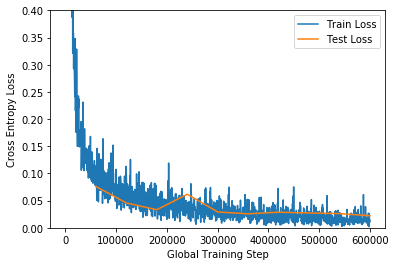

In [48]:
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(val_loss_dict, label="Test Loss")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, .4])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
os.makedirs("image_processed", exist_ok=True)
plt.savefig(os.path.join("image_processed", "task2.png"))

plt.show()

torch.save(model.state_dict(), "saved_model.torch")


In [49]:

# %%
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_val, model, loss_function)
print(f"Final Validation loss: {final_loss}. Final Validation accuracy: {final_acc}")

# %%

Final Validation loss: 0.02204861828941384. Final Validation accuracy: 0.9926
